 Tujuan utama dari analisis ini adalah untuk memberikan wawasan kepada tim marketing mengenai hal-hal berikut:

1. Meningkatkan transaksi bagi merchant-merchant yang bekerja sama dengan DOKU.
2. Memahami perilaku pelanggan yang terkait dengan promosi yang dijalankan.
3. Menganalisis aktivitas pelanggan yang berpartisipasi dalam promosi.


Bagian 2: [Python] Analisis Data menggunakan Pemrograman Python

Tugas 3: Persiapan Data, Pembersihan Data, dan Praproses

Sebelum Anda mendalami analisis lebih lanjut, pastikan tim Anda melakukan langkah-langkah berikut terlebih dahulu:

● Data ideal yang akan digunakan adalah dari tahun 2021 hingga 2024

● Bersihkan dan atur data transaksi dengan menangani nilai yang hilang, mengoreksi tipe data, dan menghapus duplikat.

● Identifikasi fitur atau kolom baru: jika kolom untuk kota, pekerjaan, dan usia terisi atau tidak kosong, maka pelanggan tersebut diklasifikasikan sebagai pelanggan Premium atau telah 

melalui proses KYC (Know Your Customer).

● Muat data yang dikonsolidasikan ke dalam Pandas DataFrame.
Setelah tim Anda melakukan langkah-langkah persiapan data:

● Lakukan EDA terperinci untuk mengungkap pola dan hubungan yang memengaruhi Kinerja bisnis.

● Visualisasikan wawasan utama menggunakan Matplotlib dan Seaborn.

# Preprocessing Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Data pertama

In [3]:
df= pd.read_csv('master_campaign.csv')
df

,Campaign ID,Campaign Name,Campaign Code,Code Used,Code Quota,Campaign Start Date,Campaign End Date,Promo Duration
0,471,ANGPAO DOKU,DOKUANGPAO100,10,500,"February 7, 2019, 00:00","February 28, 2019, 23:59",21 days
1,96,SUKA ERAFONE,SUKADOKU,16,50,"May 30, 2016, 00:00","June 5, 2016, 23:59",6 days
2,509,Thank DOKU its Friday,TDIFASMARAKU1,0,100,"May 17, 2019, 00:00","May 19, 2019, 23:59",2 days
3,512,DOKU CEBAN,CEBANMUSIC5,38,250,"May 25, 2019, 00:00","June 10, 2019, 23:59",16 days
4,854,Saatnya Ragnarok,ROODOKUNIPIN,144,"1,000","June 21, 2023, 00:00","June 30, 2023, 23:59",9 days
...,...,...,...,...,...,...,...,...
814,610,HAPPYDIRUMAH,HappyPHD,9,"1,000","March 27, 2020, 00:00","April 20, 2020, 23:59",24 days
815,263,test cinemax,testmovie,0,25,"October 1, 2017, 00:00","October 31, 2017, 23:59",30 days
816,311,Harbolnas DOKU 50K,DOKUBOLNAS50K,2,750,"December 12, 2017, 00:00","December 31, 2017, 23:59",19 days
817,10,VoucherQC,VoucherQC,0,3,"December 29, 2015, 00:00","December 31, 2015, 23:59",2 days


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign ID          819 non-null    int64 
 1   Campaign Name        819 non-null    object
 2   Campaign Code        818 non-null    object
 3   Code Used            819 non-null    object
 4   Code Quota           819 non-null    object
 5   Campaign Start Date  819 non-null    object
 6   Campaign End Date    819 non-null    object
 7   Promo Duration       819 non-null    object
dtypes: int64(1), object(7)
memory usage: 51.3+ KB


In [5]:
df.describe()

,Campaign ID
count,819.000000
mean,476.622711
std,269.566800
min,1.000000
25%,250.500000
50%,473.000000
75%,714.000000
max,939.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Campaign ID            0
Campaign Name          0
Campaign Code          1
Code Used              0
Code Quota             0
Campaign Start Date    0
Campaign End Date      0
Promo Duration         0
dtype: int64

In [8]:
# Menghapus baris yang memiliki nilai null di kolom 'Campaign Code'
df = df.dropna(subset=['Campaign Code'])
df.isna().sum()

Campaign ID            0
Campaign Name          0
Campaign Code          0
Code Used              0
Code Quota             0
Campaign Start Date    0
Campaign End Date      0
Promo Duration         0
dtype: int64

In [9]:
# # Mengonversi kolom tanggal menjadi tipe datetime
df['Campaign Start Date'] = pd.to_datetime(df['Campaign Start Date'], errors='coerce')
df['Campaign End Date'] = pd.to_datetime(df['Campaign End Date'], errors='coerce')


# Filter data kampanye yang aktif dari tahun 2021 hingga 2024
df_filter = df[
    (df['Campaign Start Date'] >= '2021-01-01') & 
    (df['Campaign End Date'] <= '2024-12-31')
]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\2063164215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Campaign Start Date'] = pd.to_datetime(df['Campaign Start Date'], errors='coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\2063164215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Campaign End Date'] = pd.to_datetime(df['Campaign End Date'], errors='coerce')


In [10]:
# Mengubah nama kolom tertentu
df_filter = df_filter.rename(columns={'Campaign ID': 'campaign_id'}).astype(str)


In [11]:
df_filter.shape

(238, 8)

### Data 2

In [12]:
df2=pd.read_csv('master_trx_campaign.csv')
df2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\3115258076.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('master_trx_campaign.csv')


,campaign_id,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt
0,901,1356,Other,"February 25, 2024, 00:00",NaN,F,NaN,NaN,40000.0,5302326,1
1,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4717349,1
2,902,1308,Other,"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4917609,1
3,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4717429,1
4,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:02",NaN,M,NaN,NaN,40000.0,4717437,1
...,...,...,...,...,...,...,...,...,...,...,...
153783,200,1237,Other,"June 14, 2017, 09:20",37.0,M,BOGOR JAWA BARAT,Karyawan Swasta,100000.0,692544,1
153784,200,1237,Other,"June 16, 2017, 16:33",45.0,F,Bandung,Swasta,200000.0,1459446,1
153785,200,1237,Other,"June 25, 2017, 11:48",24.0,M,Medan,Pelajar,100000.0,818574,1
153786,200,1237,Other,"July 2, 2017, 19:18",39.0,F,Jakarta Selatan,Ibu Rumah Tangga,100000.0,846980,1


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153788 entries, 0 to 153787
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   campaign_id             153788 non-null  int64  
 1   merchant_name           153788 non-null  int64  
 2   merchant_category_name  153788 non-null  object 
 3   transactions_datetime   153788 non-null  object 
 4   cust_age                72373 non-null   object 
 5   gender                  153262 non-null  object 
 6   city                    6264 non-null    object 
 7   job                     12631 non-null   object 
 8   paid_amount             153788 non-null  float64
 9   customer_name           153788 non-null  int64  
 10  tpt                     153788 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.9+ MB


In [14]:
# Pastikan kolom dikonversi ke tipe datetime
df2['transactions_datetime'] = pd.to_datetime(df2['transactions_datetime'], errors='coerce')

year_min = df2['transactions_datetime'].max()
print("Tahun terkecil adalah:", year_min)


Tahun terkecil adalah: 2024-10-10 23:49:00


In [15]:
df2.describe()

,campaign_id,merchant_name,transactions_datetime,paid_amount,customer_name,tpt
count,153788.000000,153788.000000,153788,1.537880e+05,1.537880e+05,153788.0
mean,727.015573,1945.835709,2022-01-22 10:56:37.735063808,8.177886e+04,3.754121e+06,1.0
min,49.000000,81.000000,2016-06-02 10:28:00,0.000000e+00,6.430000e+02,1.0
25%,624.000000,547.000000,2020-04-08 05:37:45,4.000000e+04,2.468995e+06,1.0
50%,812.000000,1308.000000,2022-11-26 14:18:00,7.600000e+04,4.275177e+06,1.0
75%,875.000000,4658.000000,2023-09-25 07:46:00,9.275000e+04,4.635879e+06,1.0
max,938.000000,44603.000000,2024-10-10 23:49:00,7.700000e+06,6.074317e+06,1.0
std,201.913630,1894.685631,NaN,1.084046e+05,1.292155e+06,0.0


In [16]:
df2.duplicated().sum()

0

In [17]:
# Calculate the missing values percentage in the original dataset
isnull = (df2.isna().sum())
isnull[isnull > 0]

cust_age     81415
gender         526
city        147524
job         141157
dtype: int64

In [18]:
# lihat_null = df2[df2['city'].isnull()]

# affected_campaigns = lihat_null['transactions_datetime'].unique()
# print(affected_campaigns)

In [19]:
# Menambahkan kolom 'is_premium' dengan label 'Premium' dan 'Non-Premium'
df2['is_premium'] = df2[['city', 'job', 'cust_age']].notnull().all(axis=1)
df2['is_premium'] = df2['is_premium'].replace({True: 'Premium', False: 'Non-Premium'})


In [20]:
# Menghitung jumlah pelanggan dengan label 'Premium'
premium_total = df2['is_premium'].value_counts().get('Premium', 0)
print(f"Jumlah pelanggan Premium: {premium_total}")

Jumlah pelanggan Premium: 6092


In [21]:
# Menangani Nilai yang Hilang
df2['city'].fillna('lainnya', inplace=True)
df2['job'].fillna('lainnya', inplace=True)
df2['gender'].fillna('Unknown', inplace=True)
# Menghapus koma dan mengonversi menjadi angka
df2['cust_age'] = df2['cust_age'].replace({',': ''}, regex=True).astype(float)
# Mengisi nilai yang hilang dengan median
df2['cust_age'].fillna(df2['cust_age'].median(), inplace=True)
df2.isna().sum()

campaign_id               0
merchant_name             0
merchant_category_name    0
transactions_datetime     0
cust_age                  0
gender                    0
city                      0
job                       0
paid_amount               0
customer_name             0
tpt                       0
is_premium                0
dtype: int64

In [22]:
# # Mengubah kolom 'campaign_id' menjadi string
df2['campaign_id'] = df2['campaign_id'].astype(str)

In [23]:
# Mengonversi kolom tanggal transaksi menjadi tipe datetime
df2['transactions_datetime'] = pd.to_datetime(df2['transactions_datetime'])

# Filter data transaksi dari tahun 2021 hingga 2024
df2_filter = df2[
    (df2['transactions_datetime'] >= '2021-01-01') & 
    (df2['transactions_datetime'] <= '2024-12-31')]

In [24]:
# Menghitung jumlah pelanggan dengan label 'Premium'
premium = df2_filter['is_premium'].value_counts().get('Premium', 0)
print(f"Jumlah pelanggan Premium: {premium}")

Jumlah pelanggan Premium: 1562


In [25]:
df2_filter.shape

(108623, 12)

## Data Gabungan

In [26]:
# Menggabungkan kedua dataset berdasarkan Campaign ID
gabung = pd.merge(df_filter, df2_filter, on='campaign_id', how='right')
gabung

,campaign_id,Campaign Name,Campaign Code,Code Used,Code Quota,Campaign Start Date,Campaign End Date,Promo Duration,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt,is_premium
0,901,CEBAN,CEBANGOC24,732,750,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,1356,Other,2024-02-25 00:00:00,33.0,F,lainnya,lainnya,40000.0,5302326,1,Non-Premium
1,903,CEBAN,CEBANCODA24,"1,301","1,500",2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,848,Retail (Not Elsewhere Classified),2024-02-25 00:01:00,33.0,M,lainnya,lainnya,40000.0,4717349,1,Non-Premium
2,902,CEBAN,CEBANUNIPIN24,"1,447","1,500",2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,1308,Other,2024-02-25 00:01:00,33.0,M,lainnya,lainnya,40000.0,4917609,1,Non-Premium
3,903,CEBAN,CEBANCODA24,"1,301","1,500",2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,848,Retail (Not Elsewhere Classified),2024-02-25 00:01:00,33.0,M,lainnya,lainnya,40000.0,4717429,1,Non-Premium
4,903,CEBAN,CEBANCODA24,"1,301","1,500",2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,848,Retail (Not Elsewhere Classified),2024-02-25 00:02:00,33.0,M,lainnya,lainnya,40000.0,4717437,1,Non-Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108618,900,CEBAN,CEBANTAGIHAN24,"1,500","1,500",2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,4658,Other,2024-02-26 21:57:00,33.0,F,lainnya,lainnya,92750.0,4546645,1,Non-Premium
108619,900,CEBAN,CEBANTAGIHAN24,"1,500","1,500",2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,4658,Other,2024-02-26 22:01:00,33.0,M,lainnya,lainnya,92750.0,4547268,1,Non-Premium
108620,900,CEBAN,CEBANTAGIHAN24,"1,500","1,500",2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,4658,Other,2024-02-26 22:01:00,33.0,M,lainnya,lainnya,92750.0,4547528,1,Non-Premium
108621,900,CEBAN,CEBANTAGIHAN24,"1,500","1,500",2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,4658,Other,2024-02-26 22:02:00,33.0,F,lainnya,lainnya,92750.0,4547171,1,Non-Premium


In [27]:
# Mengisi NaN di kolom tertentu dengan label 'Non-Campaign'
gabung['Campaign Name'] = gabung['Campaign Name'].fillna('non-campaign')
gabung['Campaign Code'] = gabung['Campaign Code'].fillna('no code')
gabung['Code Used'] = gabung['Code Used'].fillna(0)
gabung['Code Quota'] = gabung['Code Quota'].fillna(0)
gabung['Promo Duration'] = gabung['Promo Duration'].fillna(0)
gabung['Campaign Start Date'] = gabung['Campaign Start Date'].fillna(0)
gabung['Campaign End Date'] = gabung['Campaign End Date'].fillna(0)


In [28]:
# Menghitung jumlah pelanggan dengan label 'Premium'
pt = gabung['is_premium'].value_counts().get('Premium', 0)
print(f"Jumlah pelanggan Premium: {pt}")

Jumlah pelanggan Premium: 1562


In [29]:
gabung.isna().sum()

campaign_id               0
Campaign Name             0
Campaign Code             0
Code Used                 0
Code Quota                0
Campaign Start Date       0
Campaign End Date         0
Promo Duration            0
merchant_name             0
merchant_category_name    0
transactions_datetime     0
cust_age                  0
gender                    0
city                      0
job                       0
paid_amount               0
customer_name             0
tpt                       0
is_premium                0
dtype: int64

### Inconsisten Data

In [30]:
gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108623 entries, 0 to 108622
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   campaign_id             108623 non-null  object        
 1   Campaign Name           108623 non-null  object        
 2   Campaign Code           108623 non-null  object        
 3   Code Used               108623 non-null  object        
 4   Code Quota              108623 non-null  object        
 5   Campaign Start Date     108623 non-null  object        
 6   Campaign End Date       108623 non-null  object        
 7   Promo Duration          108623 non-null  object        
 8   merchant_name           108623 non-null  int64         
 9   merchant_category_name  108623 non-null  object        
 10  transactions_datetime   108623 non-null  datetime64[ns]
 11  cust_age                108623 non-null  float64       
 12  gender                  108623

In [31]:
# Membenahi tipe data sesuai dengan kebutuhan
gabung['campaign_id'] = gabung['campaign_id'].astype(str)  # Tetap string
gabung['Campaign Name'] = gabung['Campaign Name'].astype(str)  # Tetap string
gabung['Campaign Code'] = gabung['Campaign Code'].astype(str)  # Tetap string

# Konversi Code Used dan Code Quota ke numerik (hapus tanda koma jika ada)
gabung['Code Used'] = gabung['Code Used'].astype(str).str.replace(',', '').astype(float).fillna(0).astype(int)
gabung['Code Quota'] = gabung['Code Quota'].astype(str).str.replace(',', '').astype(float).fillna(0).astype(int)


# # Konversi Campaign Start Date dan Campaign End Date ke datetime
gabung['Campaign Start Date'] = gabung['Campaign Start Date'].replace('0', pd.NaT)
gabung['Campaign End Date'] = gabung['Campaign End Date'].replace('0', pd.NaT)

# Promo Duration: Tetap string karena formatnya spesifik (misal: "15 days")
gabung['Promo Duration'] = gabung['Promo Duration'].astype(str)

# merchant_name tetap sebagai int
# merchant_category_name tetap sebagai string
gabung['merchant_category_name'] = gabung['merchant_category_name'].astype(str)

In [32]:
# Identifikasi kolom dengan tipe data objek atau string
text_columns = gabung.select_dtypes(include=['object']).columns

# Ubah semua teks di kolom-kolom tersebut menjadi huruf kecil
gabung[text_columns] = gabung[text_columns].apply(lambda x: x.str.lower())


In [33]:
# Cek nilai unik
print(f'Data Unik Gender\n {gabung["gender"].unique()}')

Data Unik Gender
 ['f' 'm' 'unknown']


In [34]:
gabung['city'] = gabung['city'].str.strip()
print(f'Data Unik Kota \n{gabung["city"].unique()}')

Data Unik Kota 
['lainnya' 'kab. gresik' 'kota surabaya' 'kab. serang' 'kab. jombang'
 'kota pekalongan' 'kab. pasuruan' 'kotif cilacap' 'kab. bogor' 'padang'
 'kota depok' 'kota bekasi' 'kota bogor' 'kota balikpapan' 'kab. bekasi'
 'bandar lampung' 'kab. sukoharjo' 'jakarta selatan' 'karawang'
 'kab. semarang' 'depok' 'jawa timur' 'tangerang selatan' 'tangerang'
 'kab./kota lainnya di ntb' 'kab. kediri' 'tulungagung' 'kota banda aceh'
 'kab. sleman' 'jakarta1' 'wil. kota jakarta timur' 'bekasi'
 'kab. banyuwangi' 'kab. malang' 'kab. cilacap' 'jakarta barat' 'bogor'
 'bulukumba' 'bandung' 'denpasar barat' 'kab. sidereng rappang'
 'jakarta timur' 'jakarta' 'bekasi selatan' 'purwakarta' 'cimahi'
 'jakarta utara' 'surakarta' 'kabupaten purworejo' 'yogyakarta'
 'kabupaten subang' 'kediri' 'kabupaten grobogan'
 'wil. kota jakarta selatan' 'sukoharjo' 'pasuruan' 'brebes' 'tangsel'
 'padang panjang' 'sumenep' 'dki jakarta' 'kabupaten magetan'
 'kab. klaten' 'kab. hulu sungai selatan' 'kota ta

In [35]:
# Fungsi untuk membersihkan awalan seperti "kab.", "kota", "wil. kota"
def clean_city_name(city_name):
    if isinstance(city_name, str):  # Pastikan input adalah string
        # Buang awalan "kab.", "kota", atau "wil. kota" (dan spasi tambahan di depan)
        cleaned_name = re.sub(r'^(kab\.|kota|wil\. kota|kabupaten)\s+', '', city_name, flags=re.IGNORECASE)
        # Buang spasi berlebih
        return cleaned_name.strip()
    return city_name  # Jika bukan string, kembalikan nilai aslinya

# Terapkan fungsi pada kolom 'city'
gabung['city'] = gabung['city'].apply(clean_city_name)

# # Tampilkan hasil setelah transformasi
# print(gabung['city'].unique())


In [36]:
mapping = {
    'jaksel': 'jakarta selatan',
    'jakarta1': 'jakarta',
    'dki jakarta': 'jakarta',
    'depok jawa barat': 'depok',
    'surakarta/solo': 'surakarta',
    'tangsel': 'tangerang selatan',
    'kab./kota lainnya di banten': 'banten',
    'kab./kota lainnya di ntb': 'nusa tenggara barat',
    'denpasar barat': 'denpasar',
}


# Normalisasi data
gabung['city'] = gabung['city'].str.lower()  # Ubah ke huruf kecil
gabung['city'] = gabung['city'].replace(mapping)  # Terapkan mapping
# Tampilkan hasil setelah transformasi
print("\n".join(sorted(gabung['city'].unique())))


aceh jaya
badung
balikpapan
banda aceh
bandar lampung
bandung
bandung barat
bangka
banjarbaru
banjarnegara
banten
bantul
banyumas
banyuwangi
barru
batam
bekasi
bekasi selatan
bengkulu
binjai
blitar
blora
bogor
bojonegoro
bondowoso
brebes
bulukumba
buru selatan
ciamis
cianjur
cilacap
cimahi
cipayung
demak
denpasar
depok
dumai
garut
gianyar
gowa
gresik
grobogan
hulu sungai selatan
indragiri hulu
jakarta
jakarta barat
jakarta pusat
jakarta selatan
jakarta timur
jakarta utara
jambi
jawa timur
jepara
jombang
kampar
karawang
kediri
kendal
klaten
konawe selatan
kotawaringin barat
kotawaringin timur
kotif cilacap
kuantan singingi
kubu raya
kutai timur
lahat
lainnya
lamongan
lampung selatan
lombok barat
lombok timur
madiun
magelang
magetan
majene
makassar
malang
manado
medan
minahasa tenggara
minahasa utara
nusa tenggara barat
padang
padang panjang
palembang
palu
pandeglang
pangandaran
pasuruan
pekalongan
pekanbaru
pematang siantar
pidie jaya
pinrang
polewali mandar
pontianak
poso
prabumulih
pr

In [37]:
print(gabung['city'].value_counts())

city
lainnya            107009
depok                 123
bekasi                102
jakarta selatan        99
jakarta                92
                    ...  
bengkulu                1
bangka                  1
sorong                  1
lahat                   1
tabanan                 1
Name: count, Length: 133, dtype: int64


In [38]:
# print(f'Data Unik JOB \n {gabung["job"].unique()}') 
# Tampilan urut
print("Data Unik JOB:\n" + "\n".join(sorted(gabung["job"].unique())))

Data Unik JOB:
20
57169
63161
65176
65326
admin pajak
agen property
asn
backend developer
batu bara
belum bekerja
belum kerja
belum/tidak bekerja
berdagang
berkebun
bidan
bisnis online shop
bumn
buruh
buruh harian lepas
buruh pabrik
caregiver
copywriter
customer care
dagang
dishwasher
dokter
doku
doku db engineer
dosen
driver
driver ojek online
driver online
fisioterapis
freelance
freelancer graphic designer
gojek
graphic designer
guru
guru swasta
helper
ibu rumah tangga
irt
it
it developer
it support doku
jr. art director
junior it support
kariawan swasta
karwayan swasta
karyawan
karyawan bumn
karyawan dkrth kota surabaya
karyawan doku
karyawan full
karyawan honorer
karyawan swasta
karyawan swasta 
karyawan swata
karyawati
lain - lain
lainnya
lainya
lecturer
mahasiswa
mahasiswa s2
mahasiswi
maintenace
market analist, investor, trader
media relations and community strategies
medical representatif
mekanik
mengurus rumah tangga
montir bengkel motor
ms ipa
musician
ngopi
nurse
other
pangk

In [39]:
mapping_pekerjaan = {
    # Bahasa asing ke bahasa Indonesia
    'programmer': 'pemrogram',
    'software engineer': 'insinyur perangkat lunak',
    'graphic designer': 'desainer grafis',
    'jr. art director': 'direktur seni junior',
    'it developer': 'pengembang IT',
    'freelance': 'pekerja lepas',
    'freelancer graphic designer': 'desainer grafis lepas',
    'nurse': 'perawat',
    'customer care': 'layanan pelanggan',
    'video editor': 'editor video',
    'backend developer': 'pengembang backend',
    'ui ux designer': 'desainer UI/UX',
    'lecturer': 'dosen',
    'copywriter': 'penulis naskah',
    'musician': 'musisi',
    'technical engineree': 'teknisi',
    'welder': 'tukang las',
    'helper': 'asisten',
    'caregiver': 'pengasuh',
    'staff infra monitoring officer': 'staf monitoring infrastruktur',
    'driver':'ojek online',

    # Ketidakkonsistenan
    'karyawan swasta ': 'karyawan swasta',
    'pegawai swasta': 'karyawan swasta',
    'karyawati': 'karyawan',
    'pekerja swasta': 'karyawan swasta',
    'peg. swasta': 'karyawan swasta',
    'karyawan swata': 'karyawan swasta',
    'karwayan swasta': 'karyawan swasta',
    'kariawan swasta': 'karyawan swasta',
    'swata': 'karyawan swasta',
    'pengusahaaa': 'pengusaha',
    'pelajar/mahasiswa': 'pelajar',
    'belum/tidak bekerja': 'tidak bekerja',
    'lainya': 'lainnya',
    'lain - lain': 'lainnya',
    'asn': 'pegawai negeri sipil',
    'driver online': 'ojek online',
    'driver ojek online': 'ojek online',
    'pt. sap jakarta': 'karyawan',
    'doku db engineer': 'pengembang basis data',
    'it support doku': 'pendukung IT',
    'maintenace': 'maintenance',
    'dishwasher': 'pencuci piring',
    'market analist, investor, trader': 'analis pasar',
    'treder': 'pedagang',
    'pns':'pegawai negeri sipil',
    'po':'lainnya',
    'buruh harian lepas':'buruh',
    'buruh pabrik':'buruh',
    'gojek':'ojek online',
    'it':'pengembang IT',

    # Data tidak bermakna
    '57169': 'lainnya',
    '63161': 'lainnya',
    '20': 'lainnya',
    '65176': 'lainnya',
    '65326': 'lainnya',
    'ms ipa': 'lainnya',
    'rkabohcns. i sihs': 'lainnya',

    # Kategori Wirausaha
    'montir bengkel motor': 'wirausaha',
    'pangkas rambut': 'wirausaha',
    'tukang batu': 'wirausaha',
    'tukang las': 'wirausaha',
    'pekerja mandiri':'wirausaha',

    # Kategori Pedagang
    'dagang': 'pedagang',
    'berdagang': 'pedagang',
    'pengusaha': 'pebisnis',
    'pengusaha sablon': 'pebisnis',
    'pedagang': 'pedagang',
    'bisnis online shop': 'pebisnis',
    'wiraswata':'wiraswasta',
    'agen property': 'pebisnis',
    'analis pasar': 'pebisnis',

    # Kategori Karyawan Swasta
    'karyawan': 'karyawan swasta',
    'karyawan swasta': 'karyawan swasta',
    'karyawan full': 'karyawan swasta',
    'pegawai': 'karyawan swasta',
    'pegawai swasta': 'karyawan swasta',
    'karyawan honorer': 'karyawan swasta',
    'peg.swasta': 'karyawan swasta',
    'karyawan doku': 'karyawan swasta',
    'karyawan bumn': 'karyawan swasta',
    'swasta':'karyawan swasta',
    'penjaga toko':'karyawan swasta',
    'staff administrasi':'karyawan swasta',
    'senior staff hr':'karyawan swasta',
    'karyawan dkrth kota surabaya':'karyawan swasta',
    'staff administrasi':'karyawan swasta',
    'senior staff hr':'karyawan swasta',
    'asisten': 'karyawan swasta',
    

    # Kategori Ibu Rumah Tangga
    'ibu rumah tangga': 'ibu rumah tangga',
    'irt': 'ibu rumah tangga',
    'mengurus rumah tangga': 'ibu rumah tangga',

    # Kategori Belum/Tidak Bekerja
    'belum bekerja': 'tidak bekerja',
    'belum kerja': 'tidak bekerja',
    'tidak berkerja': 'tidak bekerja',
    

    # Kategori Pelajar/Mahasiswa
    'plajar': 'pelajar',
    'pelajar': 'pelajar',
    'mahasiswa': 'mahasiswa',
    'mahasiswa s2': 'mahasiswa',
    'mahasiswi': 'mahasiswa',

    # Kategori Profesi/Spesifik
    'dokter': 'kesehatan',
    'pengacara': 'pengajar',
    'dosen': 'profesional',
    # 'pendeta': 'profesional',
    'perawat': 'kesehatan',
    'guru': 'pengajar',
    'guru swasta': 'pengajar',
    'fisioterapis': 'kesehatan',
    'medical representatif': 'kesehatan',

    # Kategori petani
    'petani': 'petani',
    'petani/pekebun': 'petani',
    'berkebun': 'petani',
    'tani':'petani',

    # Lainnya
    'lainnya': 'lainnya',
    'other': 'lainnya',
    'ngopi': 'lainnya',  
    'tidak bekerja':'lainnya',
    'srabutan':'pekerja lepas',


    'penulis naskah': 'media komunikasi',
    'editor video': 'media komunikasi',
    'desainer grafis lepas': 'media komunikasi',
    'desainer UI/UX': 'pengembang IT',
    'bidan': 'kesehatan',
    'perawat': 'kesehatan',
    'pengasuh': 'kesehatan',
    'mekanik': 'kerajinan & industri',   
    
}


In [40]:
# Gantilah spasi non-standard atau karakter yang tidak terlihat dengan spasi biasa
gabung['job'] = gabung['job'].str.replace(r'\u200B', '', regex=True)  # Menghapus Zero Width Space
gabung['job'] = gabung['job'].str.replace(r'\u00A0', ' ', regex=True)  # Menghapus Non-Breaking Space
gabung['job'] = gabung['job'].str.strip()  # Menghapus spasi biasa di awal dan akhir string

gabung['job'] = gabung['job'].replace(mapping_pekerjaan,regex=False)

# Tampilkan hasil unik setelah transformasi, diurutkan dari A-Z
# print("\n".join(sorted(gabung['job'].unique())))

In [41]:
gabung['job'] = gabung['job'].replace(mapping_pekerjaan,regex=False)
print(gabung['job'].value_counts())

job
lainnya                                     105625
karyawan swasta                               1292
wiraswasta                                     424
mahasiswa                                      300
ibu rumah tangga                               167
pelajar                                        144
pegawai negeri sipil                            86
buruh                                           79
petani                                          60
insinyur perangkat lunak                        58
pemrogram                                       53
pengembang IT                                   37
media relations and community strategies        31
doku                                            25
wirausaha                                       23
maintenance                                     22
pedagang                                        22
direktur seni junior                            21
junior it support                               18
kesehatan                  

### Invalid Data

In [42]:
# List of checks dengan nama, kondisi, dan jumlah sampel
checks = [
    ("Invalid Age", (gabung['cust_age'] < 0) | (gabung['cust_age'] > 100)),
    ("Invalid Paid Amount", gabung['paid_amount'] <= 0),
    ("Invalid Campaign Dates", gabung['Campaign Start Date'] > gabung['Campaign End Date']),
    ("No Transactions", gabung['tpt'] == 0),
    ("Paid But No TPT", (gabung['paid_amount'] > 0) & (gabung['tpt'] == 0)),
    ("Invalid Code Usage", gabung['Code Used'] > gabung['Code Quota']),
]

# Membuat ringkasan pemeriksaan secara iteratif
summary = {
    "Issue Type": [],
    "Count": [],
    "Sample Data": [],
}

for issue_name, condition in checks:
    filtered_data = gabung[condition]
    summary["Issue Type"].append(issue_name)
    summary["Count"].append(len(filtered_data))
    summary["Sample Data"].append(filtered_data.head(3).to_dict("records"))  # 3 contoh data

# Konversi ke DataFrame
summary_df = pd.DataFrame(summary)

# Tampilkan tabel ringkasan
summary_df


,Issue Type,Count,Sample Data
0,Invalid Age,0,[]
1,Invalid Paid Amount,0,[]
2,Invalid Campaign Dates,0,[]
3,No Transactions,0,[]
4,Paid But No TPT,0,[]
5,Invalid Code Usage,0,[]


In [43]:
# Transaksi diluar periode kampanye
invalid_data = gabung[~
    (gabung['transactions_datetime'] >= gabung['Campaign Start Date']) & 
    (gabung['transactions_datetime'] <= gabung['Campaign End Date'])
]
print(invalid_data['campaign_id'].unique())
# Mengambil hanya bagian tanggal
tanggal= invalid_data['transactions_datetime'].dt.date
print(tanggal.unique())
print(invalid_data.shape)


['859']
[datetime.date(2023, 7, 25)]
(748, 19)


In [44]:
# # Filter data dengan campaign_id '859'
# periksa = gabung[gabung['campaign_id'] == '859']
# periksa

In [45]:
# Pisahkan transaksi yang terjadi di luar periode kampanye
outlier_invalid_data = gabung[~((gabung['transactions_datetime'] >= gabung['Campaign Start Date']) & 
                                (gabung['transactions_datetime'] <= gabung['Campaign End Date']))]

In [46]:
# Menghitung nilai yang hilang
missing_values = gabung.isnull().sum().sum()  # Total nilai yang hilang di seluruh dataset

# Report
report = {
    'Missing Values': missing_values,
    'Duplicate Rows': gabung.duplicated().sum(),
    'Invalid Age Range': gabung[(gabung['cust_age'] < 0) | (gabung['cust_age'] > 120)].shape[0],
    'Negative/Zero Paid Amount': gabung[gabung['paid_amount'] <= 0].shape[0],
    'Invalid Dates': gabung[gabung['Campaign Start Date'] > gabung['Campaign End Date']].shape[0]
}

# Print report
print(report)


{'Missing Values': 58, 'Duplicate Rows': 0, 'Invalid Age Range': 0, 'Negative/Zero Paid Amount': 0, 'Invalid Dates': 0}


In [47]:
# Calculate the missing values percentage in the original dataset
miss = (gabung.isna().sum())
miss[miss > 0]

Campaign Start Date    29
Campaign End Date      29
dtype: int64

In [48]:
 # Memisahkan data dengan nilai 'non-campaign' di kolom 'Campaign Name'
non_campaign = gabung[gabung['Campaign Name'] == 'non-campaign']

# Memisahkan data yang tidak memiliki nilai 'non-campaign' di kolom 'Campaign Name'
campaign = gabung[gabung['Campaign Name'] != 'non-campaign']


In [49]:
non_campaign.shape

(29, 19)

In [50]:
campaign.shape

(108594, 19)

In [51]:
# Menyimpan dalam csv
campaign.to_csv('doku_filter.csv',index=False)

## EDA Data Baru

Penjelasan setiap Kolom

1. **campaign_id**: ID unik untuk setiap kampanye promosi atau iklan yang diluncurkan oleh merchant.
2. **Campaign Name**: Nama kampanye atau promosi yang dilakukan.
3. **Campaign Code**: Kode unik yang digunakan untuk mengidentifikasi kampanye tersebut.
4. **Code Used**: Menunjukkan apakah kode promosi kampanye telah digunakan (biasanya berupa boolean atau angka).
5. **Code Quota**: Jumlah kuota atau batasan penggunaan untuk kode promosi dalam kampanye tertentu.
6. **Campaign Start Date**: Tanggal dimulainya kampanye atau promosi.
7. **Campaign End Date**: Tanggal berakhirnya kampanye atau promosi.
8. **Promo Duration**: Durasi atau jangka waktu kampanye atau promosi berlangsung, seringkali dalam bentuk hari atau bulan.
9. **merchant_name**: Nama merchant atau penjual yang menjalankan kampanye promosi.
10. **merchant_category_name**: Kategori bisnis atau jenis produk yang dijual oleh merchant (misalnya: elektronik, makanan, pakaian, dll).
11. **transactions_datetime**: Tanggal dan waktu ketika transaksi dilakukan.
12. **cust_age**: Umur pelanggan yang melakukan transaksi.
13. **gender**: Jenis kelamin pelanggan (misalnya: laki-laki atau perempuan).
14. **city**: Kota tempat pelanggan tinggal atau melakukan transaksi.
15. **job**: Pekerjaan atau profesi pelanggan.
16. **paid_amount**: Jumlah uang yang dibayarkan oleh pelanggan untuk transaksi tersebut.
17. **customer_name**: Nama pelanggan yang melakukan transaksi.
18. **tpt**: Mungkin merujuk pada Total Purchase Transaction atau indikator lain yang berkaitan dengan jumlah transaksi atau pembelian.
19. **is_premium**: Menunjukkan apakah pelanggan merupakan pelanggan premium atau tidak (biasanya berupa nilai boolean seperti 0 untuk bukan premium dan 1 untuk premium).

In [52]:
data= pd.read_csv("doku_filter.csv")
data

,campaign_id,Campaign Name,Campaign Code,Code Used,Code Quota,Campaign Start Date,Campaign End Date,Promo Duration,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt,is_premium
0,901,ceban,cebangoc24,732,750,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,1356,other,2024-02-25 00:00:00,33.0,f,lainnya,lainnya,40000.0,5302326,1,non-premium
1,903,ceban,cebancoda24,1301,1500,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,848,retail (not elsewhere classified),2024-02-25 00:01:00,33.0,m,lainnya,lainnya,40000.0,4717349,1,non-premium
2,902,ceban,cebanunipin24,1447,1500,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,1308,other,2024-02-25 00:01:00,33.0,m,lainnya,lainnya,40000.0,4917609,1,non-premium
3,903,ceban,cebancoda24,1301,1500,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,848,retail (not elsewhere classified),2024-02-25 00:01:00,33.0,m,lainnya,lainnya,40000.0,4717429,1,non-premium
4,903,ceban,cebancoda24,1301,1500,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,848,retail (not elsewhere classified),2024-02-25 00:02:00,33.0,m,lainnya,lainnya,40000.0,4717437,1,non-premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108589,900,ceban,cebantagihan24,1500,1500,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,4658,other,2024-02-26 21:57:00,33.0,f,lainnya,lainnya,92750.0,4546645,1,non-premium
108590,900,ceban,cebantagihan24,1500,1500,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,4658,other,2024-02-26 22:01:00,33.0,m,lainnya,lainnya,92750.0,4547268,1,non-premium
108591,900,ceban,cebantagihan24,1500,1500,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,4658,other,2024-02-26 22:01:00,33.0,m,lainnya,lainnya,92750.0,4547528,1,non-premium
108592,900,ceban,cebantagihan24,1500,1500,2024-02-25 00:00:00,2024-03-10 23:59:00,14 days,4658,other,2024-02-26 22:02:00,33.0,f,lainnya,lainnya,92750.0,4547171,1,non-premium


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108594 entries, 0 to 108593
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   campaign_id             108594 non-null  int64  
 1   Campaign Name           108594 non-null  object 
 2   Campaign Code           108594 non-null  object 
 3   Code Used               108594 non-null  int64  
 4   Code Quota              108594 non-null  int64  
 5   Campaign Start Date     108594 non-null  object 
 6   Campaign End Date       108594 non-null  object 
 7   Promo Duration          108594 non-null  object 
 8   merchant_name           108594 non-null  int64  
 9   merchant_category_name  108594 non-null  object 
 10  transactions_datetime   108594 non-null  object 
 11  cust_age                108594 non-null  float64
 12  gender                  108594 non-null  object 
 13  city                    108594 non-null  object 
 14  job                 

In [54]:
# Mengubah tipe data kolom menjadi datetime
data['Campaign Start Date'] = pd.to_datetime(data['Campaign Start Date'])
data['Campaign End Date'] = pd.to_datetime(data['Campaign End Date'])
data['transactions_datetime'] = pd.to_datetime(data['transactions_datetime'])

# Mengubah kolom yang seharusnya berupa string
data['merchant_name'] = data['merchant_name'].astype(str)
data['customer_name'] = data['customer_name'].astype(str)
data['campaign_id'] = data['campaign_id'].astype(str)
data['Campaign Name'] = data['Campaign Name'].str.strip()

In [55]:
# Calculate the missing values percentage in the original dataset
kosong = (data.isna().sum())
kosong[kosong > 0]

Series([], dtype: int64)

In [56]:
data.duplicated().sum()

0

In [57]:
# Atur format tampilan float menjadi bilangan bulat
pd.options.display.float_format = '{:.0f}'.format

data.describe()

,Code Used,Code Quota,Campaign Start Date,Campaign End Date,transactions_datetime,cust_age,paid_amount,tpt
count,108594,108594,108594,108594,108594,108594,108594,108594
mean,1155,1207,2023-04-20 06:14:54.679264,2023-05-07 00:33:31.009447424,2023-04-22 13:43:29.671252736,32,69302,1
min,1,100,2021-01-25 00:00:00,2021-02-10 23:59:00,2021-01-25 08:16:00,12,2000,1
25%,746,750,2022-09-26 00:00:00,2022-10-10 23:59:00,2022-10-06 17:24:30,33,40000,1
50%,1448,1500,2023-05-25 00:00:00,2023-06-10 23:59:00,2023-05-25 13:41:00,33,42750,1
75%,1489,1500,2023-12-25 00:00:00,2024-01-10 23:59:00,2023-12-25 05:41:45,33,92750,1
max,1500,1500,2024-09-25 00:00:00,2024-10-10 23:59:00,2024-10-10 23:49:00,87,2093459,1
std,408,382,NaN,NaN,NaN,4,49632,0


In [58]:
data.describe(include='object')

,campaign_id,Campaign Name,Campaign Code,Promo Duration,merchant_name,merchant_category_name,gender,city,job,customer_name,is_premium
count,108594,108594,108594,108594,108594,108594,108594,108594,108594,108594,108594
unique,167,25,167,16,30,6,3,133,45,23207,2
top,933,ceban,cebancoda008,16 days,4658,other,m,lainnya,lainnya,4623008,non-premium
freq,1500,102061,1500,52467,39539,85723,80713,106984,105609,57,107036


In [59]:
# Menghitung jumlah pelanggan dengan label 'Premium'
jumlah_premium = data['is_premium'].value_counts().get('premium', 0)
print(f"Jumlah pelanggan Premium: {jumlah_premium}")

Jumlah pelanggan Premium: 1558


In [60]:
# Menghitung jumlah pelanggan dengan label 'Premium'
jumlah_premium = data['is_premium'].value_counts().get('non-premium', 0)
print(f"Jumlah pelanggan Non Premium: {jumlah_premium}")

Jumlah pelanggan Non Premium: 107036


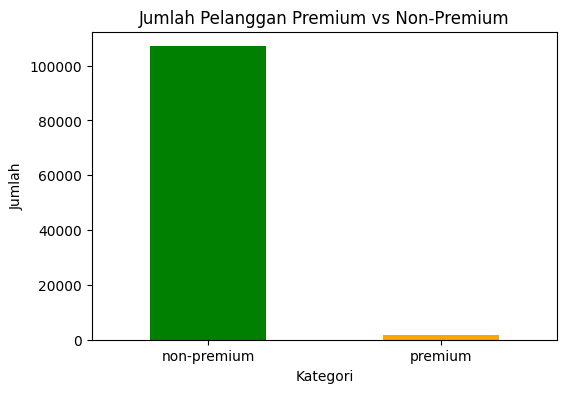

In [61]:
# Visualisasi
counts = data['is_premium'].value_counts()
counts.plot(kind='bar', color=['green','orange'], figsize=(6, 4))
plt.title('Jumlah Pelanggan Premium vs Non-Premium')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

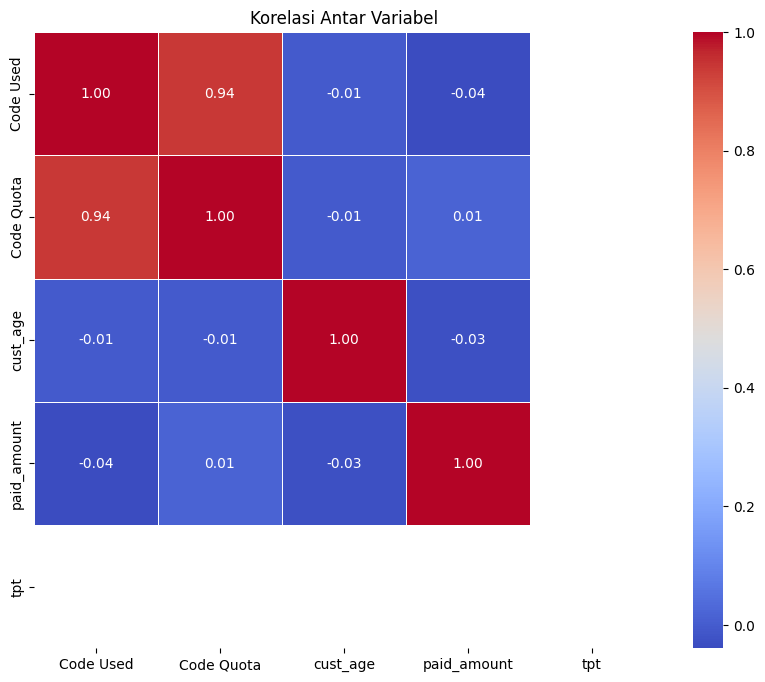

In [62]:
# Pilih kolom numerik
numeric_data = data.select_dtypes(include=['number'])
# Hitung korelasi antar kolom numerik
correlation = numeric_data.corr()

# Visualisasikan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Variabel')
plt.show()

In [63]:
# Kelompokkan data berdasarkan customer_name dan tanggal transaksi
customer_transactions = data.groupby(
    ['customer_name', data['transactions_datetime'].dt.date]
).size().reset_index(name='transaction_count')

# Cari transaksi maksimum
max_transaction_count = customer_transactions['transaction_count'].max()

# Filter pelanggan dengan transaksi maksimum
max_transactions = customer_transactions[
    customer_transactions['transaction_count'] == max_transaction_count
]

# Tampilkan hasil
print('Transaksi terbanyak dalam sehari:',max_transactions['transaction_count'].max())
print(max_transactions)

Transaksi terbanyak dalam sehari: 4
      customer_name transactions_datetime  transaction_count
46          1031739            2023-09-25                  4
7995        3514802            2023-10-25                  4
10092       3754830            2023-09-25                  4
10108       3754834            2023-09-25                  4
10109       3754834            2023-10-25                  4
...             ...                   ...                ...
85083       5548415            2023-12-25                  4
85113       5548990            2023-12-25                  4
85115       5549100            2023-12-25                  4
85116       5549151            2023-12-25                  4
85118       5549155            2023-12-25                  4

[123 rows x 3 columns]


### Part EDA

##### 1. Memisahkan Paid amount yang besar

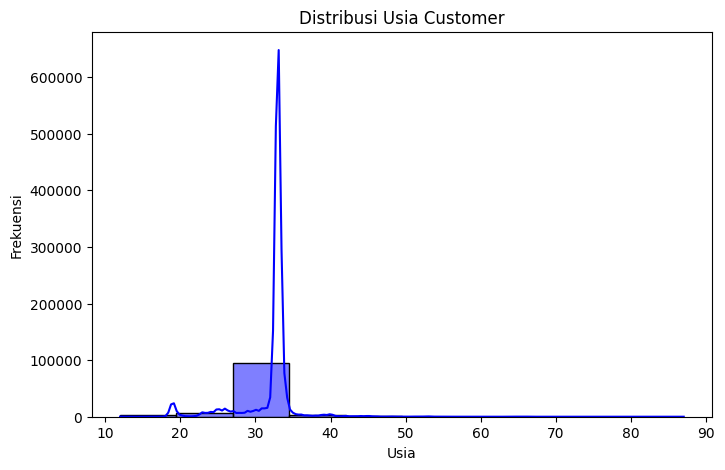

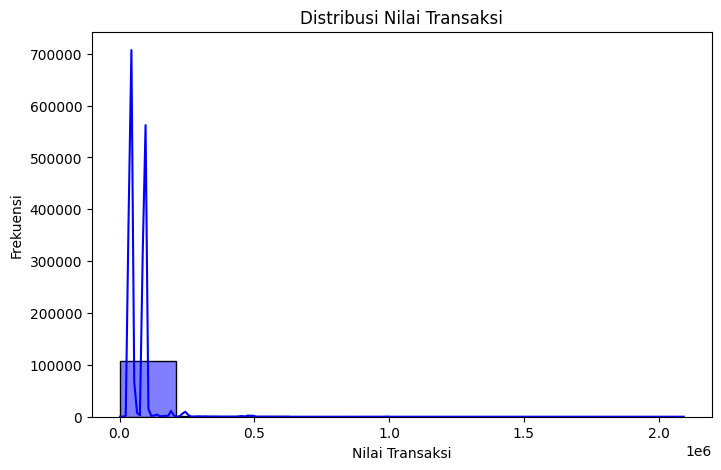

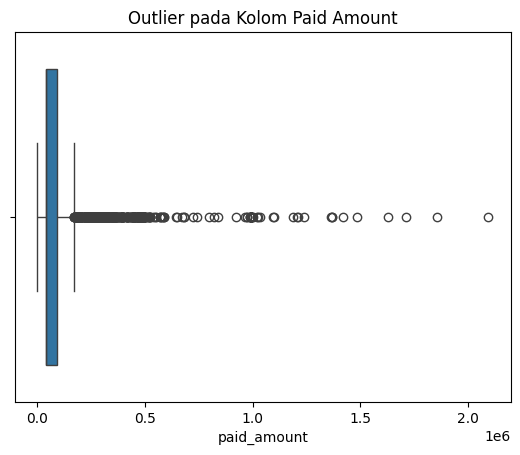

In [64]:
# Visualisasi distribusi dari beberapa kolom penting
# Histogram untuk distribusi nilai transaksi (paid_amount)
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='cust_age', bins=10, kde=True, color='blue')
plt.title('Distribusi Usia Customer')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk distribusi nilai transaksi (paid_amount)
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='paid_amount', bins=10, kde=True, color='blue')
plt.title('Distribusi Nilai Transaksi')
plt.xlabel('Nilai Transaksi')
plt.ylabel('Frekuensi')
plt.show()


# Contoh untuk paid_amount
sns.boxplot(data=data, x='paid_amount')
plt.title('Outlier pada Kolom Paid Amount')
plt.show()


In [65]:
Q1 = data['paid_amount'].quantile(0.25)
Q3 = data['paid_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['paid_amount'] < lower_bound) | (data['paid_amount'] > upper_bound)]
outliers['campaign_id'].count()

2522

In [66]:
# Memisahkan data yang diluar outlier
data = data[(data['paid_amount'] >= lower_bound) & (data['paid_amount'] <= upper_bound)]

# Menampilkan jumlah data yang bukan outlier
print(f"Jumlah data yang bukan outlier: {data.shape[0]}")

# Menampilkan data yang bukan outlier
data.head()


Jumlah data yang bukan outlier: 106072


,campaign_id,Campaign Name,Campaign Code,Code Used,Code Quota,Campaign Start Date,Campaign End Date,Promo Duration,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt,is_premium
0,901,ceban,cebangoc24,732,750,2024-02-25,2024-03-10 23:59:00,14 days,1356,other,2024-02-25 00:00:00,33,f,lainnya,lainnya,40000,5302326,1,non-premium
1,903,ceban,cebancoda24,1301,1500,2024-02-25,2024-03-10 23:59:00,14 days,848,retail (not elsewhere classified),2024-02-25 00:01:00,33,m,lainnya,lainnya,40000,4717349,1,non-premium
2,902,ceban,cebanunipin24,1447,1500,2024-02-25,2024-03-10 23:59:00,14 days,1308,other,2024-02-25 00:01:00,33,m,lainnya,lainnya,40000,4917609,1,non-premium
3,903,ceban,cebancoda24,1301,1500,2024-02-25,2024-03-10 23:59:00,14 days,848,retail (not elsewhere classified),2024-02-25 00:01:00,33,m,lainnya,lainnya,40000,4717429,1,non-premium
4,903,ceban,cebancoda24,1301,1500,2024-02-25,2024-03-10 23:59:00,14 days,848,retail (not elsewhere classified),2024-02-25 00:02:00,33,m,lainnya,lainnya,40000,4717437,1,non-premium


##### 2. Menghitung Transaksi Dalam Waktu

In [67]:
# Menambahkan kolom 'date' untuk hari dan 'month' untuk bulan
data['date'] = data['transactions_datetime'].dt.date
data['month'] = data['transactions_datetime'].dt.to_period('M')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\2066989980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['transactions_datetime'].dt.date
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\2066989980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['transactions_datetime'].dt.to_period('M')


In [68]:
# Menghitung jumlah transaksi harian
daily_transactions = data.groupby('date').size()

# Menampilkan hasil
print(daily_transactions)
daily_transactions.describe().apply(lambda x: f"{x:,.0f}")

date
2021-01-25    126
2021-01-26    306
2021-01-27    173
2021-01-28     80
2021-01-29     69
             ... 
2024-10-01    104
2024-10-03     47
2024-10-06     20
2024-10-08     71
2024-10-10     30
Length: 421, dtype: int64


count      421
mean       252
std        628
min          1
25%          7
50%         53
75%        187
max      4,368
dtype: object

Kesimpulan: 

Secara keseluruhan, data ini menunjukkan ketidakteraturan dalam distribusi transaksi harian, dengan beberapa hari yang sangat sibuk dan banyak hari yang jauh lebih sepi dalam hal transaksi.

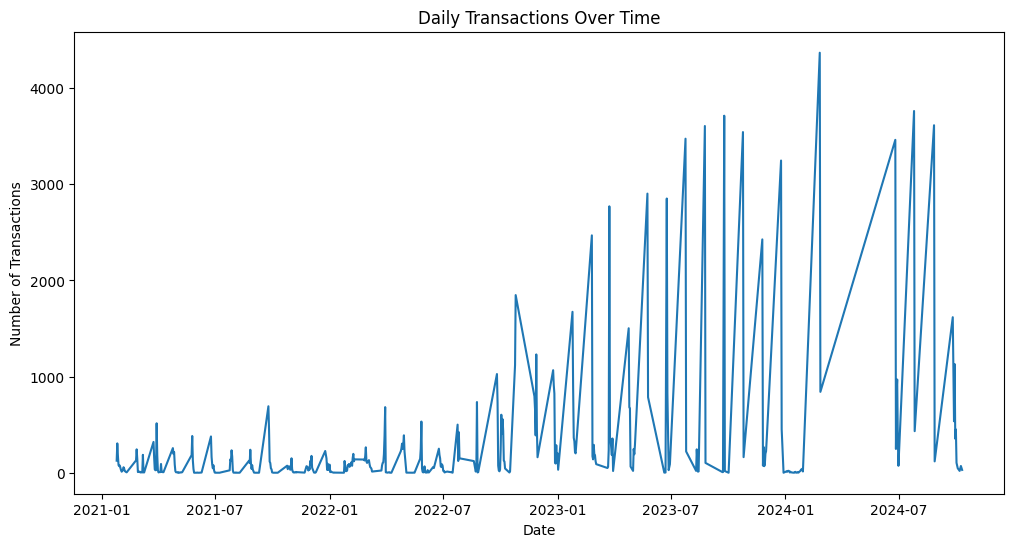

In [69]:
daily_transactions = data.groupby('date').size().reset_index(name='transaction_count')

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['date'], daily_transactions['transaction_count'])
plt.title('Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\4204196189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['transactions_datetime'].dt.day_name()  # Menampilkan nama hari
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\4204196189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_weekend'] = data['day_of_week'].apply(lambda x: 'Akhir Pekan' if x in ['Saturday', 'Sunday'] else 'Hari Kerja')


    is_weekend  mean        sum  count
0  Akhir Pekan 58377 1608289577  27550
1   Hari Kerja 65948 5178346595  78522


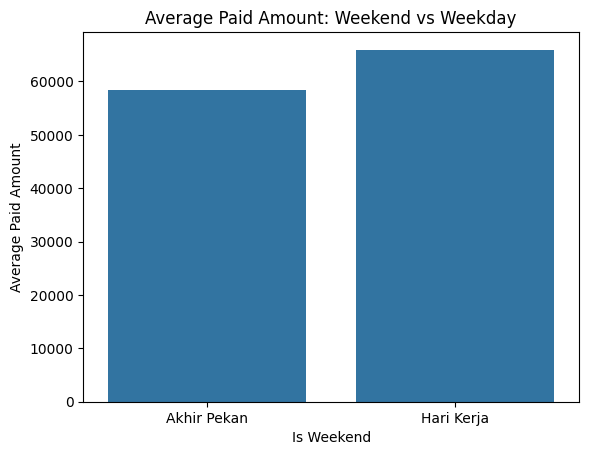

In [70]:
data['day_of_week'] = data['transactions_datetime'].dt.day_name()  # Menampilkan nama hari
# Menambahkan kolom is_weekend dengan label "Weekend" atau "Weekday"
data['is_weekend'] = data['day_of_week'].apply(lambda x: 'Akhir Pekan' if x in ['Saturday', 'Sunday'] else 'Hari Kerja')


weekend_analysis = data.groupby('is_weekend')['paid_amount'].agg(['mean', 'sum', 'count']).reset_index()
print(weekend_analysis)
sns.barplot(data=weekend_analysis, x='is_weekend', y='mean')
plt.title('Average Paid Amount: Weekend vs Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Average Paid Amount')
plt.show()


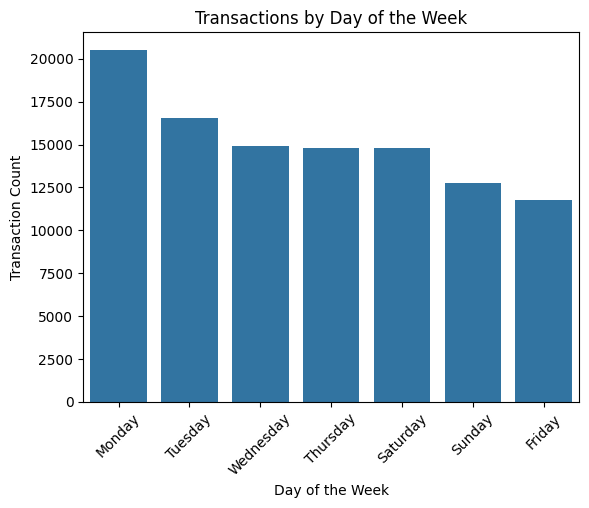

In [71]:
weekday_analysis = data.groupby('day_of_week').size().reset_index(name='transaction_count')
weekday_analysis = weekday_analysis.sort_values('transaction_count', ascending=False)

sns.barplot(data=weekday_analysis, x='day_of_week', y='transaction_count')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


Dari hasil tersebut, dapat disimpulkan bahwa:

1. **Hari dengan transaksi terbanyak** adalah **Senin (20520 transaksi)**.
2. **Hari dengan transaksi paling sedikit** adalah **Jumat (11750 transaksi)**.
3. Pola transaksi harian menunjukkan bahwa aktivitas transaksi cenderung lebih tinggi di awal minggu (Senin) dan menurun secara bertahap hingga akhir minggu, dengan sedikit kenaikan pada hari Sabtu dibandingkan Jumat.
4. **Akhir pekan (Sabtu dan Minggu)** memiliki jumlah transaksi yang cukup tinggi dibandingkan dengan Jumat, tetapi masih lebih rendah dibandingkan awal minggu.

Dapat disimpulkan bahwa aktivitas transaksi cenderung lebih ramai di awal minggu dan sedikit menurun mendekati akhir minggu.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\597231661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transactions_datetime'] = pd.to_datetime(data['transactions_datetime'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\597231661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['transactions_datetime'].dt.day_name()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\597231661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


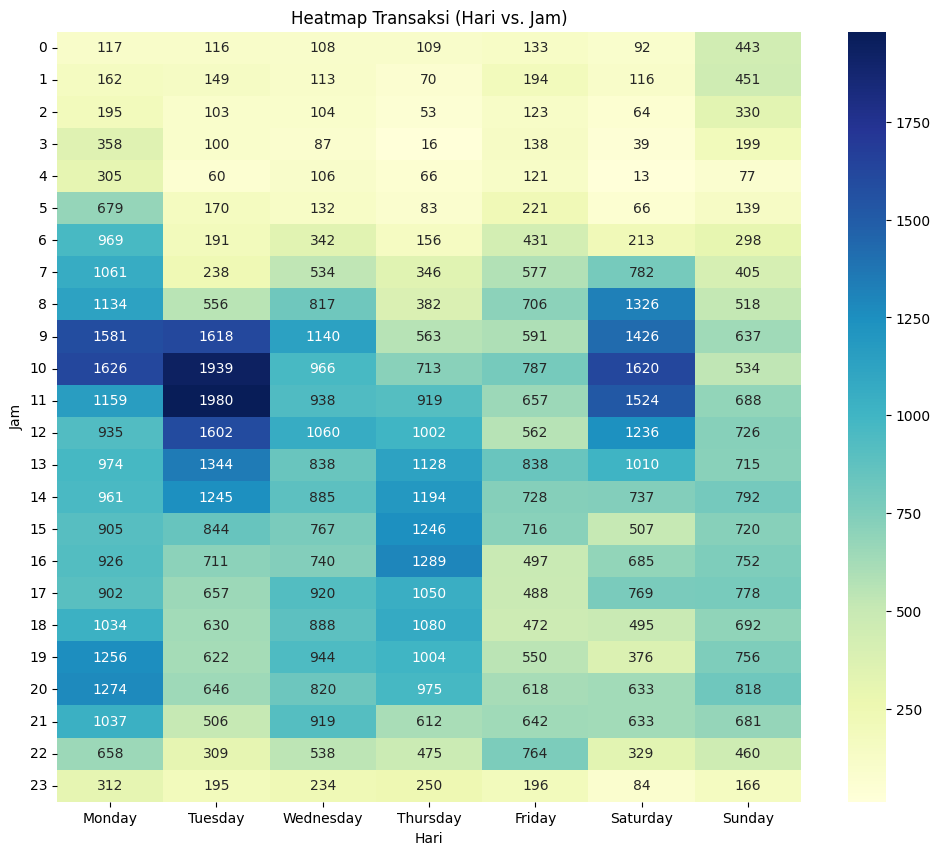

In [72]:
# Pastikan transactions_datetime adalah datetime
data['transactions_datetime'] = pd.to_datetime(data['transactions_datetime'])

# Ekstrak hari dan jam
data['day'] = data['transactions_datetime'].dt.day_name()
data['hour'] = data['transactions_datetime'].dt.hour

heatmap_data = data.groupby(['day', 'hour']).size().unstack()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Heatmap Transaksi (Hari vs. Jam)')
plt.ylabel('Jam')
plt.yticks(rotation=0)
plt.xlabel('Hari')
plt.show()

Dari data jumlah transaksi berdasarkan hari dan jam, berikut adalah kesimpulan yang dapat diambil:

**Pola Umum**
1. **Jam Sibuk (Peak Hours):** 
   - Aktivitas transaksi paling tinggi terjadi antara pukul **07.00 hingga 11.00**, terutama pada hari kerja (Senin - Jumat).
   - Puncak transaksi tertinggi terlihat pada jam **10.00** dan **11.00** di sebagian besar hari kerja.

2. **Jam Sepi (Off-Peak Hours):**
   - Transaksi paling rendah terjadi antara pukul **02.00 hingga 05.00** di semua hari.

**Perbandingan Hari**
1. **Hari Kerja (Senin - Jumat):**
   - Aktivitas transaksi lebih merata sepanjang jam kerja (07.00 - 18.00), dengan lonjakan besar di pagi hari (07.00 - 11.00).
   - **Senin** adalah hari dengan transaksi paling tinggi, terutama pada jam **09.00 - 11.00**.
   - **Jumat** memiliki aktivitas transaksi yang lebih rendah dibandingkan hari kerja lainnya.

2. **Akhir Pekan (Sabtu dan Minggu):**
   - **Sabtu** menunjukkan lonjakan besar di pagi hari (**08.00 - 10.00**) dengan pola aktivitas yang cukup tinggi dibandingkan Minggu.
   - **Minggu** memiliki pola transaksi yang relatif lebih rendah, dengan puncak di pagi hari sekitar **08.00 - 10.00**.

**Temuan Khusus**
- **Senin pukul 10.00** adalah waktu awal minggu dengan jumlah transaksi tertinggi (1626 transaksi).
- **Minggu pukul 04.00** adalah waktu dengan transaksi terendah (77 transaksi).
- Aktivitas di malam hari (21.00 - 23.00) cenderung menurun signifikan di semua hari.

**Kesimpulan Umum**
- Aktivitas transaksi paling tinggi terjadi di pagi hari selama hari kerja, terutama di awal minggu.
- Akhir pekan menunjukkan pola transaksi yang lebih terkonsentrasi pada pagi hari dengan penurunan signifikan di malam hari.
- Perlu perhatian khusus pada puncak dan sepinya aktivitas untuk pengelolaan sumber daya operasional.

##### 3. Menghitung Rata-rata Transaksi Harian

In [73]:
# Menghitung rata-rata nilai transaksi harian
daily_avg_value = data.groupby('date')['paid_amount'].mean()
print(daily_avg_value)
# daily_avg_value.describe()
daily_avg_value.describe().apply(lambda x: f"{x:,.0f}")


date
2021-01-25   92384
2021-01-26   92992
2021-01-27   92591
2021-01-28   94019
2021-01-29   92511
              ... 
2024-10-01   40000
2024-10-03   40000
2024-10-06   42000
2024-10-08   42000
2024-10-10   40000
Name: paid_amount, Length: 421, dtype: float64


count        421
mean      80,537
std       23,693
min        2,000
25%       60,096
50%       91,315
75%       93,455
max      137,500
Name: paid_amount, dtype: object

Kesimpulan

Distribusi rata-rata nilai transaksi harian menunjukkan adanya variasi yang cukup besar, dengan beberapa hari yang jauh di atas rata-rata (mungkin terkait dengan kampanye atau promosi khusus). Sementara sebagian besar hari berada di sekitar nilai median, ada beberapa hari yang mencatat transaksi sangat tinggi. Hal ini menjadi acuan untuk memahami kapan kampanye atau strategi pemasaran tertentu berhasil meningkatkan nilai transaksi secara signifikan.

In [74]:
# Hitung rata-rata nilai transaksi harian
daily_data = data.groupby('date')['paid_amount'].mean().reset_index(name='rerata harian')

# Hitung Q1 (25%) dan Q3 (75%) dari nilai transaksi harian
Q1 = daily_data['rerata harian'].quantile(0.25)
Q3 = daily_data['rerata harian'].quantile(0.75)

# Tentukan batasan untuk segmentasi
bins = [0, Q1, Q3, float('inf')]  # Batas transaksi untuk segmentasi
labels = ['Transaksi Rendah', 'Transaksi Sedang', 'Transaksi Tinggi']  # Label untuk segmen

# Segmentasi berdasarkan transaksi harian
daily_data['tren_transaksi'] = pd.cut(daily_data['rerata harian'], bins=bins, labels=labels)
daily_data

,date,rerata harian,tren_transaksi
0,2021-01-25,92384,Transaksi Sedang
1,2021-01-26,92992,Transaksi Sedang
2,2021-01-27,92591,Transaksi Sedang
3,2021-01-28,94019,Transaksi Tinggi
4,2021-01-29,92511,Transaksi Sedang
...,...,...,...
416,2024-10-01,40000,Transaksi Rendah
417,2024-10-03,40000,Transaksi Rendah
418,2024-10-06,42000,Transaksi Rendah
419,2024-10-08,42000,Transaksi Rendah


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\2080988225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


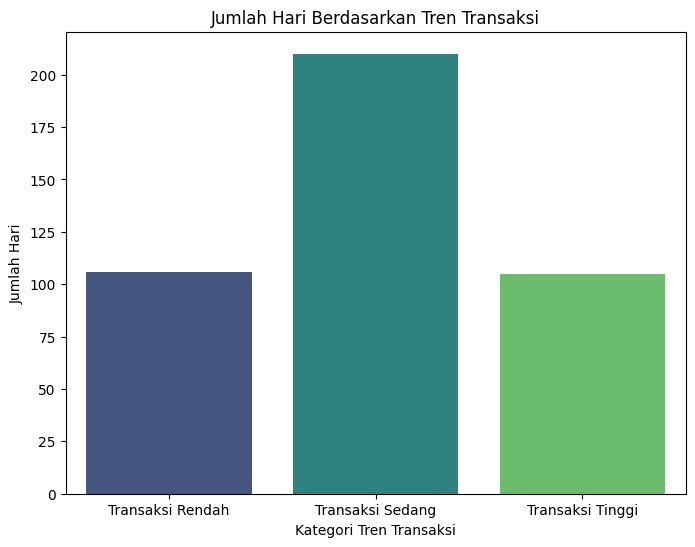

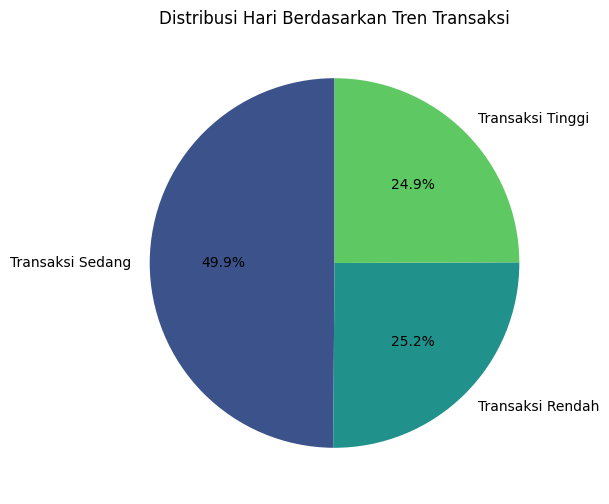

In [75]:
# Hitung jumlah hari per kategori 'tren_transaksi'
segment_counts = daily_data['tren_transaksi'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Jumlah Hari Berdasarkan Tren Transaksi')
plt.xlabel('Kategori Tren Transaksi')
plt.ylabel('Jumlah Hari')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Distribusi Hari Berdasarkan Tren Transaksi')
plt.show()


##### 4. FREKUENSI PELANGGAN

In [76]:
# Menghitung frekuensi transaksi per pelanggan
customer_transactions = data.groupby('customer_name').size()
print(customer_transactions)
customer_transactions.describe().apply(lambda x: f"{x:,.0f}")

customer_name
1008444     3
1015849    17
1018500     1
1024704    13
1031739    29
           ..
959258      3
968024      1
968181      8
978923      1
993419      6
Length: 22318, dtype: int64


count    22,318
mean          5
std           7
min           1
25%           1
50%           2
75%           5
max          57
dtype: object

Kesimpulan

Transaksi dengan Jumlah Rendah: Sebagian besar pelanggan (75%) bertransaksi hanya sedikit, dengan mayoritas transaksi berjumlah antara 1 hingga 5 transaksi. Ini mungkin menunjukkan bahwa kampanye memiliki tingkat partisipasi yang relatif rendah dari mayoritas pelanggan.

Outlier atau Pelanggan Loyal: Nilai maksimum 57 transaksi menandakan adanya pelanggan yang sangat aktif dalam kampanye, yang dapat dianggap sebagai pelanggan loyal atau pengguna dengan frekuensi transaksi tinggi. Ini bisa menjadi target utama untuk program pemasaran lebih lanjut, seperti memberikan insentif bagi pelanggan yang sering bertransaksi.

In [77]:
# Hitung jumlah transaksi per pelanggan
transaction_counts = data.groupby('customer_name').size()

# Tentukan batas untuk segmentasi
bins = [0, 5, 25, float('inf')]  # Batas transaksi untuk segmentasi
labels = ['Potensial', 'Aktif', 'Loyal']  # Label untuk segmen

# Buat segmentasi berdasarkan jumlah transaksi
customer_segments = pd.cut(transaction_counts, bins=bins, labels=labels)

# Gabungkan segmentasi ke DataFrame
transaction_counts = transaction_counts.to_frame(name='transaction_count')  # Ubah menjadi DataFrame
transaction_counts['segmentasi pelanggan'] = customer_segments  # Tambahkan segmentasi

transaction_counts


,transaction_count,segmentasi pelanggan
customer_name,,
1008444,3,Potensial
1015849,17,Aktif
1018500,1,Potensial
1024704,13,Aktif
1031739,29,Loyal
...,...,...
959258,3,Potensial
968024,1,Potensial
968181,8,Aktif


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\1906929984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


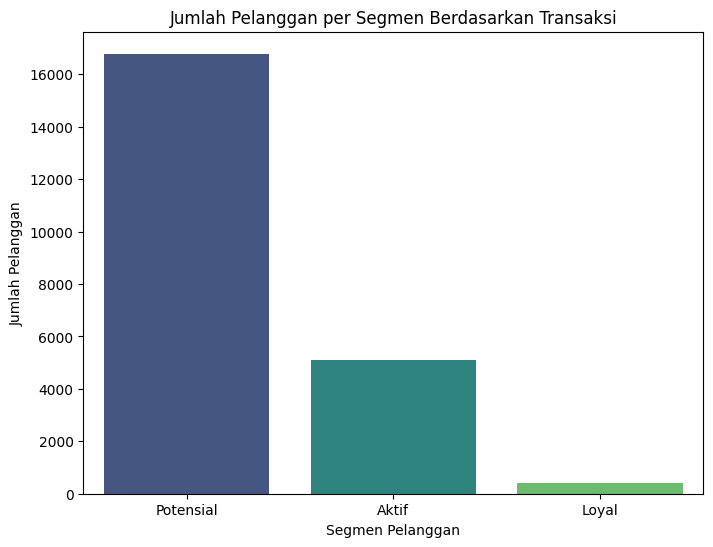

In [78]:
# Hitung jumlah pelanggan per segmen
segment_counts = transaction_counts['segmentasi pelanggan'].value_counts()

# Visualisasi Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Jumlah Pelanggan per Segmen Berdasarkan Transaksi')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.show()


##### 5. Total Transaksi per Merchant

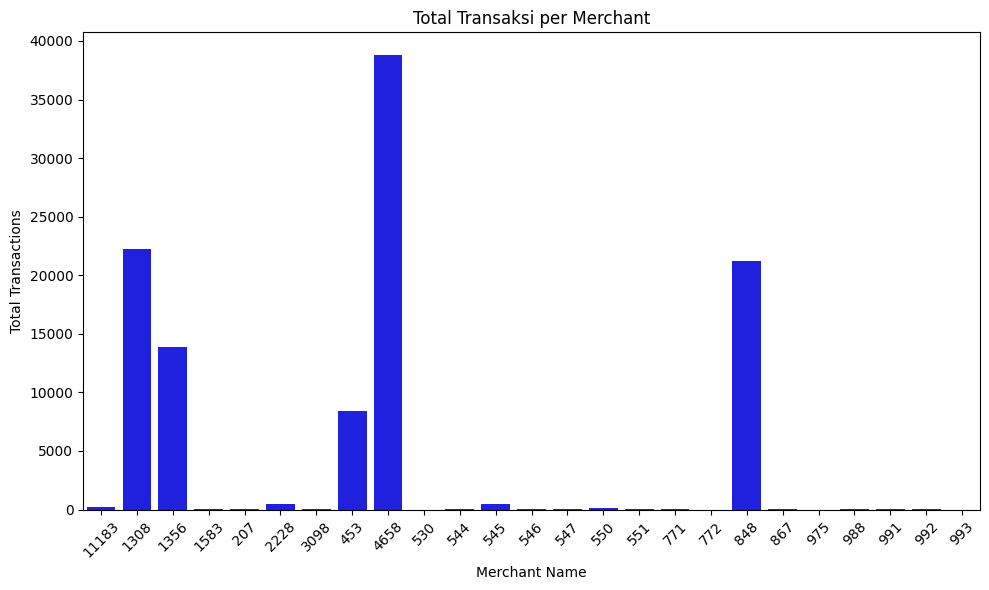

In [79]:
# # Agregasi data
merchant_summary = data.groupby('merchant_name').agg(
    total_transactions=('tpt', 'count'),  # Jumlah transaksi per merchant
    average_transaction_value=('paid_amount', 'mean')  # Rata-rata nilai transaksi per merchant
).reset_index()

# Sortir merchant berdasarkan total transaksi (atau rata-rata nilai transaksi) secara descending
# top_merchants = merchant_summary.sort_values(by='total_transactions', ascending=False).head(10)

# Bar chart untuk total transaksi per merchant
plt.figure(figsize=(10, 6))
sns.barplot(data=merchant_summary, x='merchant_name', y='total_transactions', color='blue')
plt.title('Total Transaksi per Merchant')
plt.xlabel('Merchant Name')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)  # Rotasi label jika nama merchant panjang
plt.tight_layout()  # Menghindari overlap pada label
plt.show()



In [120]:
merchant_summary.describe()

,total_transactions,average_transaction_value
count,25,25
mean,4243,90113
std,9709,28720
min,1,40196
25%,8,76716
50%,23,91625
75%,462,110350
max,38795,138775


In [80]:
# Agregasi data berdasarkan merchant_name
merchant_performance = data.groupby('merchant_name').agg({
    'transactions_datetime': 'count',  # Hitung jumlah transaksi
    'paid_amount': 'mean'  # Total pendapatan
}).reset_index()

# Hitung median
median_revenue = merchant_performance['transactions_datetime'].median()
median_transactions = merchant_performance['paid_amount'].median()

# Tambahkan kolom segmentasi
def segment_merchant(row):
    if row['transactions_datetime'] >= median_revenue and row['paid_amount'] >= median_transactions:
        return 'High Revenue, High Volume'
    elif row['transactions_datetime'] < median_revenue and row['paid_amount'] >= median_transactions:
        return 'Low Revenue, High Volume'
    elif row['transactions_datetime'] >= median_revenue and row['paid_amount'] < median_transactions:
        return 'High Revenue, Low Volume'
    else:
        return 'Low Revenue, Low Volume'

merchant_performance['segment'] = merchant_performance.apply(segment_merchant, axis=1)

# Lihat distribusi segmen
print(merchant_performance['segment'].value_counts())

segment
High Revenue, Low Volume     8
Low Revenue, High Volume     8
High Revenue, High Volume    5
Low Revenue, Low Volume      4
Name: count, dtype: int64


In [81]:
median_revenue

23.0

Dari data yang diberikan tentang segmen transaksi, berikut adalah kesimpulan yang dapat diambil:

**1. Distribusi Segmen:**
- **High Revenue, Low Volume**: Terdapat **8 segmen** yang menghasilkan pendapatan tinggi meskipun volume transaksi rendah.
- **Low Revenue, High Volume**: Terdapat **8 segmen** dengan pendapatan rendah tetapi volume transaksi tinggi.
- **High Revenue, High Volume**: Terdapat **5 segmen** yang memiliki pendapatan dan volume transaksi tinggi.
- **Low Revenue, Low Volume**: Terdapat **4 segmen** dengan pendapatan dan volume transaksi yang rendah.

**2. Observasi:**
- Segmen dengan jumlah tertinggi adalah **High Revenue, Low Volume** dan **Low Revenue, High Volume** (masing-masing 8 segmen).
- Segmen **High Revenue, High Volume** relatif lebih jarang (5 segmen), menunjukkan bahwa kombinasi ini lebih sulit dicapai atau lebih eksklusif.
- Segmen **Low Revenue, Low Volume** adalah yang paling sedikit (4 segmen), yang bisa dianggap sebagai prioritas terendah atau segmen yang kurang memberikan kontribusi.

**3. Kesimpulan:**
- Fokus strategi dapat diarahkan pada segmen **High Revenue, Low Volume** dan **High Revenue, High Volume** untuk memaksimalkan profitabilitas.
- Segmen **Low Revenue, High Volume** dapat menjadi peluang jika ada optimisasi untuk meningkatkan pendapatan.
- Segmen **Low Revenue, Low Volume** dapat dievaluasi untuk menentukan apakah layak dipertahankan atau dialihkan.

##### 6. Indikasi Promo

In [82]:
# Hitung jumlah penggunaan promo dan kuota
campaign_stats = data.groupby(['Campaign Code', 'Campaign Name']).agg(
    code_used=('Code Used', 'count'),
    code_quota=('Code Quota', 'first'),
        # Asumsikan kuota sama untuk seluruh baris di kampanye yang sama
).reset_index()

# Redemption rate
campaign_stats['persentase'] = (campaign_stats['code_used'] / campaign_stats['code_quota']) * 100
print(campaign_stats)
campaign_stats.describe()

             Campaign Code          Campaign Name  code_used  code_quota  \
0                 anaklama                lordoku          1         500   
1              angpaoceban                  ceban        102        1000   
2         angpaocebanmusic                  ceban          5         250   
3       angpaocebantagihan                  ceban        481         500   
4           angpaounipin25           bikin untung        181         500   
..                     ...                    ...        ...         ...   
149            tdifbittime                   tdif        243         250   
150           tdifunipin10                   tdif         16        1500   
151           tdifunipin23                   tdif         48         500   
152  testcampaignceban1234  testcampaignceban1234          1         100   
153           unipindoku10     unipin ulang tahun          7        1000   

     persentase  
0             0  
1            10  
2             2  
3            96

,code_used,code_quota,persentase
count,154,154,154
mean,689,873,65
std,577,466,44
min,1,100,0
25%,48,500,8
50%,738,750,96
75%,1428,1500,99
max,1500,1500,101


Kesimpulan:
- Sebagian besar kode digunakan dengan efisiensi tinggi (median persentase: 96%), tetapi ada variasi besar di antara sampel.
- Beberapa entri menunjukkan penggunaan berlebih (persentase > 100%) yang dapat memerlukan tinjauan lebih lanjut untuk memastikan kepatuhan atau mendeteksi kesalahan data.
- Ada juga sebagian kecil kode yang hampir tidak digunakan (persentase mendekati 0%) meskipun kuota tersedia, menunjukkan peluang untuk optimisasi.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\3782747280.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\3782747280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


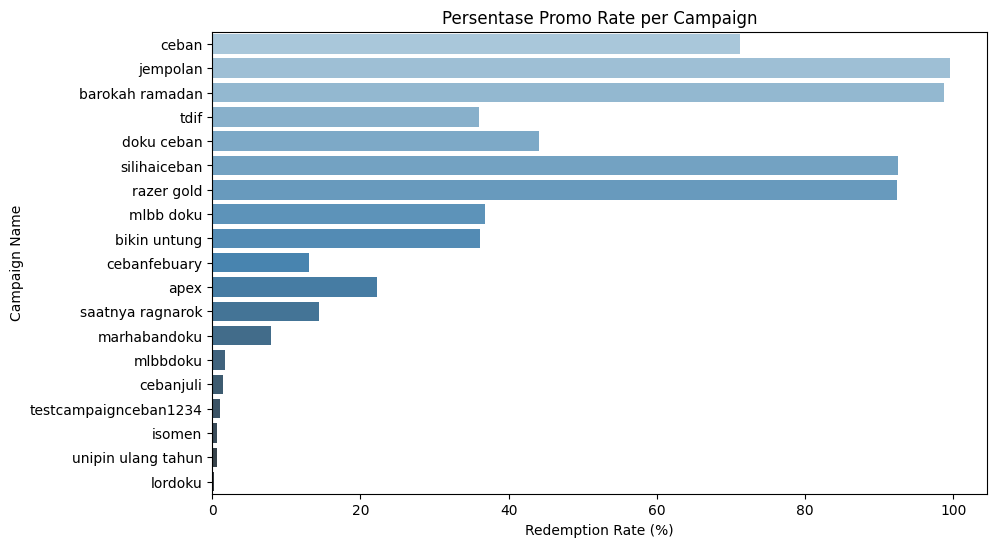

In [83]:
# Visualisasi Persentasi rate
plt.figure(figsize=(10, 6))
sns.barplot(
    data=campaign_stats.sort_values(by='persentase', ascending=False),
    y='Campaign Name', x='persentase', palette='Blues_d', ci=None
)
plt.title('Persentase Promo Rate per Campaign')
plt.ylabel('Campaign Name')
plt.xlabel('Redemption Rate (%)')
plt.show()

In [84]:
promo_transactions = data.groupby("Campaign Name").size().reset_index(name="Transaction Count")
promo_effectiveness = data.groupby("Campaign Name").agg({
    "paid_amount": ["mean", "sum", "count"]
}).reset_index()
promo_effectiveness.columns = ["Campaign Name", "Avg Transaction Value", "Total Revenue", "Transaction Count"]
promo_effectiveness


,Campaign Name,Avg Transaction Value,Total Revenue,Transaction Count
0,apex,40000,4440000,111
1,barokah ramadan,40000,39520000,988
2,bikin untung,128061,23179000,181
3,ceban,63528,6409671205,100896
4,cebanfebuary,45601,5882536,129
5,cebanjuli,119648,1316130,11
6,doku ceban,90959,89504110,984
7,isomen,130000,390000,3
8,jempolan,95402,23755000,249
9,lordoku,150000,150000,1


Dari data kampanye, berikut adalah beberapa analisis dan kesimpulan:

**1. Kampanye dengan Total Pendapatan (Revenue) Tertinggi:**
- **Ceban**: Pendapatan tertinggi sebesar **6.4 miliar** (Rp 6.409.671.205) dengan **100.896 transaksi**.
  - Hal ini menunjukkan keberhasilan kampanye ini dalam menarik volume transaksi yang besar, meskipun rata-rata nilai transaksinya (**Rp 63.528**) lebih rendah dibanding beberapa kampanye lain.

**2. Kampanye dengan Nilai Transaksi Rata-Rata (Avg Transaction Value) Tertinggi:**
- **Lordoku**: Nilai transaksi rata-rata mencapai **Rp 150.000**, meskipun hanya dilakukan **1 transaksi**.
- Kampanye lain dengan rata-rata transaksi tinggi:
  - **Isomen**: Rp 130.000 (3 transaksi).
  - **Razer Gold**: Rp 100.931 (462 transaksi).
  - **Tdif**: Rp 99.550 (307 transaksi).

**3. Kampanye dengan Jumlah Transaksi Tertinggi:**
- **Ceban**: Jumlah transaksi terbesar dengan **100.896 transaksi**.
- Kampanye dengan jumlah transaksi tinggi lainnya:
  - **Silihaiceban**: **1.389 transaksi**.
  - **Barokah Ramadan**: **988 transaksi**.
  - **Doku Ceban**: **984 transaksi**.

**4. Kampanye dengan Performa Rendah:**
- Kampanye dengan pendapatan rendah meskipun memiliki rata-rata transaksi tinggi:
  - **Lordoku**: Rp 150.000 (1 transaksi, total Rp 150.000).
  - **Isomen**: Rp 130.000 (3 transaksi, total Rp 390.000).
  - **Marhabandoku**: Rp 75.000 (8 transaksi, total Rp 600.000).

- Kampanye dengan rata-rata transaksi rendah:
  - **Testcampaignceban1234**: Rp 2.000 (1 transaksi).

**5. Kesimpulan Umum:**
- **Ceban** adalah kampanye paling sukses berdasarkan total pendapatan dan jumlah transaksi. Kampanye ini tampaknya berfokus pada volume tinggi dengan nilai transaksi rata-rata yang relatif rendah.
- Kampanye dengan nilai transaksi rata-rata tinggi, seperti **Razer Gold** dan **Tdif**, memberikan kontribusi pendapatan besar tetapi dari volume transaksi yang lebih kecil.
- Beberapa kampanye dengan volume transaksi sangat rendah (misalnya, **Lordoku**, **Testcampaignceban1234**) mungkin perlu dievaluasi ulang efektivitasnya.

**Rekomendasi:**
1. **Optimasi Kampanye Volume Tinggi:** Kampanye seperti **Ceban** dapat dimaksimalkan dengan promosi lebih lanjut atau penyesuaian strategi untuk meningkatkan nilai transaksi rata-rata.
2. **Evaluasi Kampanye Volume Rendah:** Kampanye dengan jumlah transaksi rendah dan pendapatan kecil, seperti **Isomen** atau **Testcampaignceban1234**, mungkin memerlukan penyesuaian atau penghentian jika tidak efektif.
3. **Fokus pada Kampanye Berimbang:** Kampanye seperti **Razer Gold** dan **Tdif**, yang memiliki kombinasi nilai transaksi tinggi dan volume moderat, bisa menjadi prioritas untuk skalabilitas.

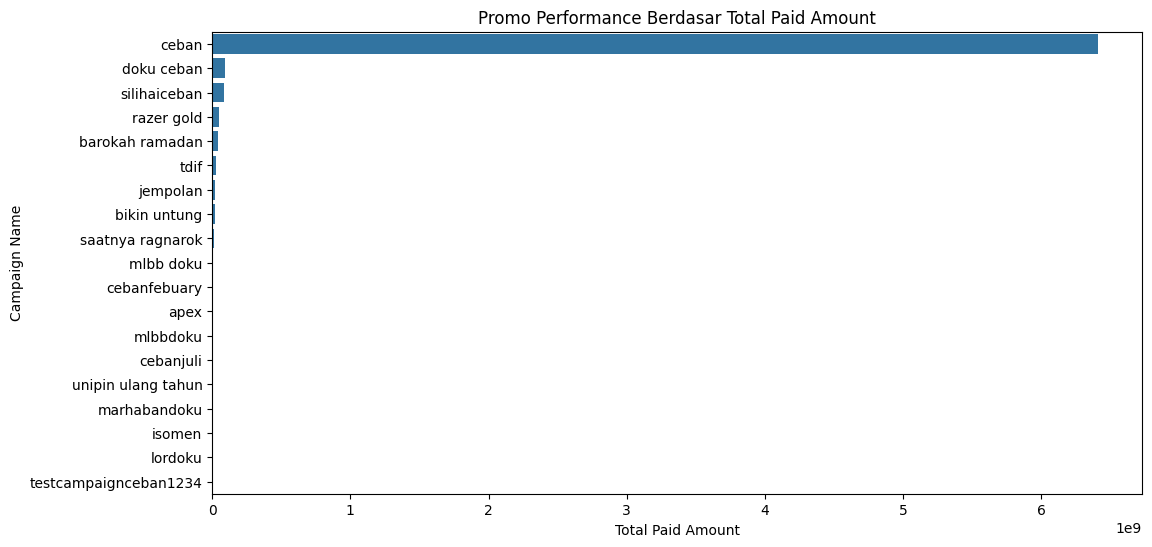

In [85]:
promo_performance = data.groupby('Campaign Name').agg({
    'paid_amount': 'sum',  # Total jumlah uang
    'transactions_datetime': 'count'  # Hitung jumlah transaksi
}).rename(columns={'paid_amount': 'total_amount', 'transactions_datetime': 'transaction_count'})


promo_performance = promo_performance.sort_values('total_amount', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=promo_performance.index, x=promo_performance['total_amount'])
# plt.xticks(rotation=45)
plt.title('Promo Performance Berdasar Total Paid Amount')
plt.ylabel('Campaign Name')
plt.xlabel('Total Paid Amount')
plt.show()

Kesimpulan dan Rekomendasi

1. Kampanye yang Perlu Diprioritaskan:
Kampanye seperti Ceban, Doku Ceban, dan Silihaiceban memiliki volume transaksi yang besar dan kontribusi pendapatan signifikan. Strategi perlu difokuskan pada peningkatan keberhasilan kampanye ini dengan menambah promosi atau mempertahankan formatnya.
2. Kampanye Berbasis Transaksi Nilai Tinggi:
Kampanye seperti Razer Gold dan Tdif menghasilkan nilai transaksi rata-rata tinggi meskipun jumlah transaksi relatif kecil. Ini menunjukkan segmen pelanggan dengan daya beli tinggi yang dapat dimanfaatkan lebih lanjut.
3. Kampanye Performa Rendah:
Kampanye dengan pendapatan rendah seperti Testcampaignceban1234, Marhabandoku, lordoku dan isomen perlu dievaluasi ulang. Jika tidak ada potensi peningkatan, sumber daya bisa dialihkan ke kampanye lain.
4. Diversifikasi Strategi:
Mengembangkan strategi untuk menggabungkan kampanye volume tinggi dengan rata-rata nilai transaksi lebih tinggi dapat membantu meningkatkan pendapatan secara keseluruhan.

In [86]:
# data['unique_campaign'] = data['Campaign Name'] + "_" + data['Campaign Code']
# promo_by_time = data.groupby(['unique_campaign', 'transaction_month']).size().reset_index(name='Transaction Count')
# promo_by_time
# sns.lineplot(data=promo_by_time, x='transaction_month', y='Transaction Count',hue='unique_campaign')
# plt.title("Monthly Transaction Trends per Campaign Variation")
# legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()


##### 7. Performa Kampanye

In [87]:
# Hitung metrik performa kampanye
campaign_performance = data.groupby(['Campaign Code', 'Campaign Name']).agg(
    total_transactions=('paid_amount', 'count'),
    total_revenue=('paid_amount', 'sum'),
    avg_transaction_value=('paid_amount', 'mean')
).reset_index()
campaign_performance

,Campaign Code,Campaign Name,total_transactions,total_revenue,avg_transaction_value
0,anaklama,lordoku,1,150000,150000
1,angpaoceban,ceban,102,9705100,95148
2,angpaocebanmusic,ceban,5,224950,44990
3,angpaocebantagihan,ceban,481,44644984,92817
4,angpaounipin25,bikin untung,181,23179000,128061
...,...,...,...,...,...
149,tdifbittime,tdif,243,21922000,90214
150,tdifunipin10,tdif,16,2160000,135000
151,tdifunipin23,tdif,48,6480000,135000
152,testcampaignceban1234,testcampaignceban1234,1,2000,2000


In [88]:
campaign_performance.describe()

,total_transactions,total_revenue,avg_transaction_value
count,154,154,154
mean,689,44069066,67736
std,577,44415730,30489
min,1,2000,2000
25%,48,4284090,40357
50%,738,29960000,45300
75%,1428,65794402,92925
max,1500,138303223,150000


Dari statistik hasil deskriptif yang diberikan, berikut adalah analisis untuk total transaksi (**total_transactions**), total pendapatan (**total_revenue**), dan rata-rata nilai transaksi (**avg_transaction_value**):

**Observasi Utama:**
1. **Variasi yang Besar:**
   - Kampanye memiliki variasi besar baik dalam jumlah transaksi, total pendapatan, maupun rata-rata nilai transaksi.
   - Standar deviasi yang tinggi di semua metrik menunjukkan adanya beberapa kampanye yang jauh lebih sukses dibandingkan rata-rata.

2. **Distribusi Transaksi dan Pendapatan:**
   - Sebagian besar kampanye memiliki jumlah transaksi dan pendapatan yang terkonsentrasi di kuartil ke-2 dan ke-3 (50%-75%), dengan beberapa outlier yang memiliki performa luar biasa tinggi.

3. **Rata-rata Nilai Transaksi:**
   - Kampanye dengan nilai transaksi rata-rata tinggi (hingga Rp 150.000) berpotensi fokus pada segmen pelanggan premium.
   - Sebaliknya, kampanye dengan nilai transaksi rata-rata rendah (Rp 2.000) cenderung lebih fokus pada volume.

**Kesimpulan:**
- **Segmen Kampanye:** Ada dua pola kampanye yang terlihat:
  - **Volume Tinggi, Nilai Transaksi Rendah:** Fokus pada banyak pelanggan dengan nilai transaksi kecil, misalnya kampanye seperti *Ceban*.
  - **Volume Rendah, Nilai Transaksi Tinggi:** Fokus pada pelanggan dengan daya beli tinggi, seperti kampanye *Razer Gold* atau *Tdif*.

- **Optimalisasi:** Kampanye dengan jumlah transaksi kecil dan pendapatan rendah dapat dievaluasi efektivitasnya. Kampanye dengan pendapatan besar tetapi standar deviasi tinggi dapat dianalisis untuk mereplikasi keberhasilannya.

- **Strategi:** Menggabungkan pendekatan volume tinggi dengan peningkatan nilai transaksi rata-rata dapat memberikan hasil yang lebih optimal.

In [89]:
# Tambahkan kolom waktu (bulan, hari, dll.)
# Buat kolom baru untuk membedakan kampanye
data['unique_campaign'] = data['Campaign Name'] + "_" + data['Campaign Code']
transactions_per_campaign = data.groupby('unique_campaign').size().reset_index(name='Transaction Count')
# Tambahkan kolom waktu (bulan, hari, dll.)
data['transaction_month'] = pd.to_datetime(data['transactions_datetime']).dt.month
data['transaction_day'] = pd.to_datetime(data['transactions_datetime']).dt.day_name()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\3952940923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unique_campaign'] = data['Campaign Name'] + "_" + data['Campaign Code']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\3952940923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transaction_month'] = pd.to_datetime(data['transactions_datetime']).dt.month
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\3952940923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [90]:
# Hitung durasi kampanye dalam hari
data['Promo Duration'] = (
    pd.to_datetime(data['Campaign End Date']) - pd.to_datetime(data['Campaign Start Date'])
).dt.days

# Hitung metrik efisiensi per durasi
efficiency_stats = data.groupby(['Campaign Code', 'Campaign Name']).agg(
    total_revenue=('paid_amount', 'sum'),
    promo_duration=('Promo Duration', 'first')  # Durasi sama untuk satu kampanye
).reset_index()

# Efisiensi pendapatan per hari
efficiency_stats['revenue_per_day'] = efficiency_stats['total_revenue'] / efficiency_stats['promo_duration']
efficiency_stats

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\2894859153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Promo Duration'] = (


,Campaign Code,Campaign Name,total_revenue,promo_duration,revenue_per_day
0,anaklama,lordoku,150000,14,10714
1,angpaoceban,ceban,9705100,13,746546
2,angpaocebanmusic,ceban,224950,13,17304
3,angpaocebantagihan,ceban,44644984,13,3434230
4,angpaounipin25,bikin untung,23179000,31,747710
...,...,...,...,...,...
149,tdifbittime,tdif,21922000,9,2435778
150,tdifunipin10,tdif,2160000,18,120000
151,tdifunipin23,tdif,6480000,9,720000
152,testcampaignceban1234,testcampaignceban1234,2000,1,2000


In [91]:
efficiency_stats.describe()

,total_revenue,promo_duration,revenue_per_day
count,154,154,154
mean,44069066,16,2873632
std,44415730,4,2921734
min,2000,1,2000
25%,4284090,15,288889
50%,29960000,16,1975270
75%,65794402,16,4165177
max,138303223,42,10264478


Dari statistik deskriptif mengenai **total pendapatan (total_revenue)**, **durasi promosi (promo_duration)**, dan **pendapatan per hari (revenue_per_day)**, berikut adalah analisisnya:

**Observasi Utama**
1. **Durasi Promosi yang Relatif Konsisten:**
   - Sebagian besar kampanye berlangsung selama **16 hari**, dengan variasi kecil.
   - Hanya sedikit kampanye yang memiliki durasi lebih panjang (hingga 42 hari).

2. **Variasi Pendapatan Per Hari:**
   - Pendapatan harian bervariasi secara signifikan, dari **Rp 2.000** hingga lebih dari **Rp 10 juta**.
   - Rata-rata pendapatan harian (Rp 2.873.632) relatif dekat dengan standar deviasi, menunjukkan distribusi yang tersebar luas.

3. **Kampanye Performa Tinggi:**
   - Kampanye dengan pendapatan tinggi juga memiliki efisiensi waktu yang baik, menghasilkan pendapatan harian yang jauh di atas rata-rata (misalnya, kampanye dengan Rp 10.264.478 per hari).

4. **Kampanye Performa Rendah:**
   - Kampanye dengan pendapatan total kecil (misalnya, Rp 2.000) menunjukkan efisiensi waktu yang sangat rendah, terutama jika berlangsung lebih dari beberapa hari.

**Kesimpulan dan Rekomendasi**

1. **Efisiensi Kampanye:**
   - Kampanye dengan durasi lebih panjang (> 16 hari) harus mampu menghasilkan pendapatan per hari yang signifikan agar tetap layak dilakukan.
   - Kampanye dengan pendapatan harian rendah (< Rp 288.889) mungkin perlu evaluasi ulang strategi atau targetnya.

2. **Fokus pada Kampanye Efisien:**
   - Kampanye dengan pendapatan harian tinggi (> Rp 4.165.177) dapat dijadikan contoh untuk meningkatkan efisiensi kampanye lainnya.

3. **Optimalisasi Durasi:**
   - Sebagian besar kampanye sudah memiliki durasi optimal (16 hari). Kampanye dengan durasi lebih pendek (misalnya 1-5 hari) dapat diuji coba untuk promosi yang lebih fokus dan terarah.

4. **Segmentasi Kampanye:**
   - Membagi kampanye berdasarkan pendapatan harian dan total pendapatan untuk menentukan prioritas pengembangan. Kampanye dengan performa tinggi harus dilanjutkan atau diperluas.

In [92]:
campaign_performance =data.groupby(['Campaign Code', 'Campaign Name']).agg({
    'paid_amount': ['mean', 'sum', 'count']
}).reset_index()

campaign_performance.columns = ['Campaign Code', 'Campaign Name', 'Avg Transaction Value', 'Total Revenue', 'Transaction Count']
campaign_performance

,Campaign Code,Campaign Name,Avg Transaction Value,Total Revenue,Transaction Count
0,anaklama,lordoku,150000,150000,1
1,angpaoceban,ceban,95148,9705100,102
2,angpaocebanmusic,ceban,44990,224950,5
3,angpaocebantagihan,ceban,92817,44644984,481
4,angpaounipin25,bikin untung,128061,23179000,181
...,...,...,...,...,...
149,tdifbittime,tdif,90214,21922000,243
150,tdifunipin10,tdif,135000,2160000,16
151,tdifunipin23,tdif,135000,6480000,48
152,testcampaignceban1234,testcampaignceban1234,2000,2000,1


In [93]:
campaign_performance.describe()

,Avg Transaction Value,Total Revenue,Transaction Count
count,154,154,154
mean,67736,44069066,689
std,30489,44415730,577
min,2000,2000,1
25%,40357,4284090,48
50%,45300,29960000,738
75%,92925,65794402,1428
max,150000,138303223,1500


Dari statistik deskriptif mengenai **rata-rata nilai transaksi (Avg Transaction Value)**, **total pendapatan (Total Revenue)**, dan **jumlah transaksi (Transaction Count)**, berikut adalah analisisnya:

**Observasi Utama**
1. **Variasi yang Tinggi:**
   - Ada variasi yang besar baik dalam **jumlah transaksi** maupun **total pendapatan** antar kampanye, seperti yang terlihat dari standar deviasi yang tinggi.
   - Kampanye dengan performa sangat rendah (misalnya **Rp 2.000**) bertindak sebagai outlier dibandingkan dengan kampanye yang memiliki performa tinggi (misalnya **Rp 138.303.223**).

2. **Hubungan antara Nilai Transaksi dan Jumlah Transaksi:**
   - Kampanye dengan **jumlah transaksi tinggi** (di atas 1.428 transaksi) cenderung menghasilkan **pendapatan yang lebih tinggi**.
   - Kampanye dengan **nilai transaksi rata-rata tinggi** (di atas Rp 92.925) cenderung memiliki **total pendapatan yang lebih besar**.

3. **Efisiensi Kampanye:**
   - Kampanye dengan **nilai transaksi rendah** dan **jumlah transaksi kecil** kemungkinan memiliki pendapatan yang terbatas.
   - Kampanye dengan **nilai transaksi tinggi** tetapi **jumlah transaksi kecil** (misalnya kampanye premium) masih dapat menghasilkan pendapatan besar.

**Kesimpulan dan Rekomendasi**

1. **Kampanye dengan Nilai Transaksi Rendah dan Banyak Transaksi:**
   - Kampanye yang memiliki **jumlah transaksi besar** dengan **nilai transaksi rendah** cenderung menghasilkan pendapatan lebih rendah meskipun volume transaksi tinggi. Sebaiknya, strategi ini lebih difokuskan pada segmen pasar massal dengan harga lebih terjangkau.

2. **Kampanye dengan Nilai Transaksi Tinggi:**
   - Kampanye yang memiliki **nilai transaksi tinggi** (di atas Rp 92.925) seperti **premium campaigns** cenderung lebih menguntungkan meskipun dengan **jumlah transaksi yang lebih sedikit**. Untuk kampanye seperti ini, memperbesar nilai transaksi dapat memberikan dampak positif.

3. **Optimasi untuk Kampanye Volume Tinggi:**
   - Kampanye dengan **jumlah transaksi tinggi** namun **pendapatan lebih rendah** dapat dilakukan **cross-selling** atau **up-selling** untuk meningkatkan nilai transaksi per pelanggan.

4. **Prioritas pada Kampanye dengan Volume dan Pendapatan Tinggi:**
   - Kampanye yang memiliki kombinasi **jumlah transaksi tinggi** dan **pendapatan tinggi**, seperti **Ceban** atau **Silihaiceban**, adalah kandidat yang kuat untuk dilanjutkan atau diperluas.

5. **Evaluasi Kampanye dengan Performa Lemah:**
   - Kampanye dengan **pendapatan rendah dan jumlah transaksi sedikit** harus dievaluasi, apakah perlu pengoptimalan atau penghentian jika tidak memberikan hasil yang signifikan.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\1791368366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unique_campaign'] = data['Campaign Name'] + "_" + data['Campaign Code']
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\1791368366.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_campaigns, x='Total Revenue', y='unique_campaign', palette='viridis')


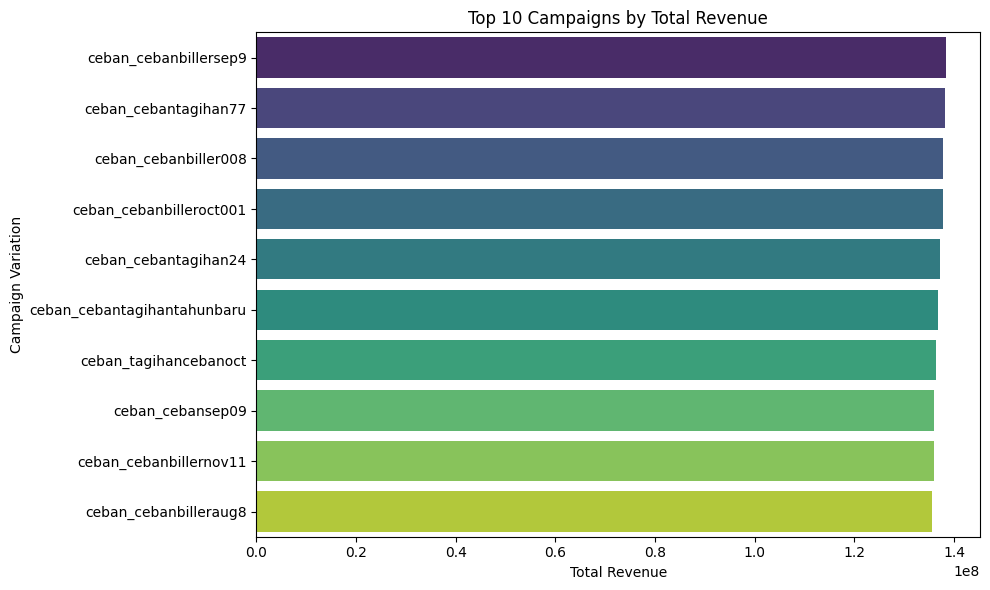

In [94]:
# Tambahkan kolom unique_campaign
data['unique_campaign'] = data['Campaign Name'] + "_" + data['Campaign Code']

# Agregasi data berdasarkan unique_campaign
campaign_performance = data.groupby('unique_campaign').agg({
    'paid_amount': 'sum'
}).rename(columns={'paid_amount': 'Total Revenue'}).reset_index()

# Ambil 10 kampanye dengan pendapatan tertinggi
top_10_campaigns = campaign_performance.nlargest(10, 'Total Revenue')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_campaigns, x='Total Revenue', y='unique_campaign', palette='viridis')
plt.title("Top 10 Campaigns by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Campaign Variation")
plt.tight_layout()
plt.show()


##### Cluster

c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

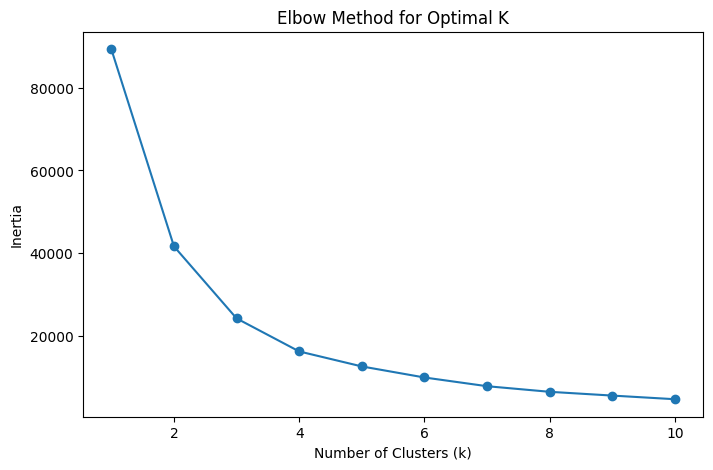

In [95]:
customer_data = data.groupby('customer_name').agg(
    total_transactions=('campaign_id', 'count'),
    total_spent=('paid_amount', 'sum'),
    avg_transaction_value=('paid_amount', 'mean'),
    promo_usage=('Code Used', lambda x: x.notnull().sum()),
    # is_campaign=('is_campaign', 'max')  # Menambahkan informasi apakah ada campaign atau tidak
).reset_index()

scaler = StandardScaler()
features = ['total_transactions', 'total_spent', 'avg_transaction_value', 'promo_usage']
customer_data_scaled = scaler.fit_transform(customer_data[features])

# Tentukan Jumlah Cluster (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


c:\Users\ASUS\envs\env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


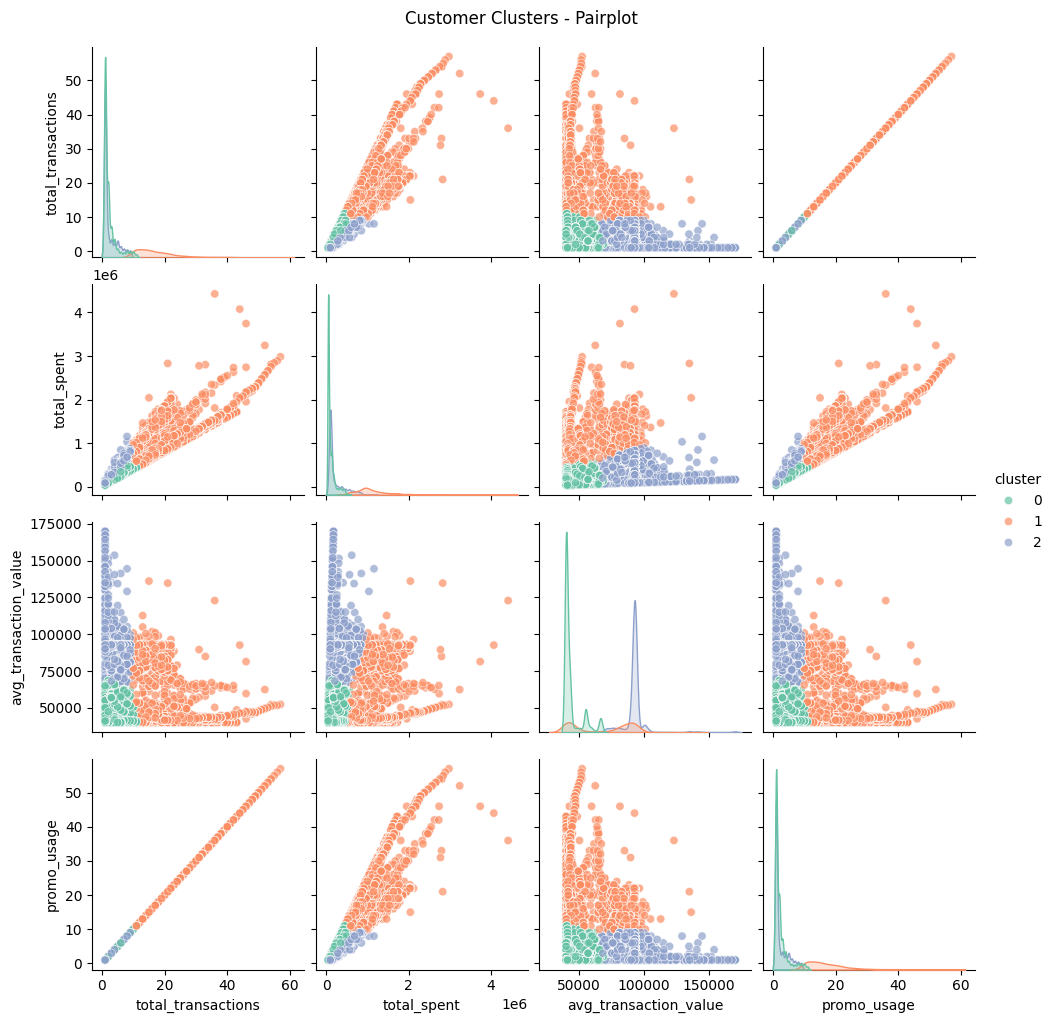

In [96]:
# K-Means Clustering dengan k Optimal
k_optimal = 3  # Pilih berdasarkan hasil elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)# Mendapatkan centroid

# Visualisasi dengan Pairplot
sns.pairplot(
    customer_data, 
    hue='cluster', 
    vars=['total_transactions', 'total_spent', 'avg_transaction_value', 'promo_usage'], 
    palette='Set2', 
    plot_kws={'alpha':0.7}
)
plt.suptitle('Customer Clusters - Pairplot', y=1.02)
plt.show()


In [97]:
# Statistik deskriptif per cluster
cluster_characteristics = customer_data.groupby('cluster')[['total_transactions', 'total_spent', 'avg_transaction_value', 'promo_usage']].mean()

# Menampilkan hasil
print("Karakteristik rata-rata setiap cluster:")
print(cluster_characteristics)

# Jumlah data di setiap cluster
cluster_counts = customer_data['cluster'].value_counts()

# Menampilkan hasil
print("Jumlah data di setiap cluster:")
print(cluster_counts)



Karakteristik rata-rata setiap cluster:
         total_transactions  total_spent  avg_transaction_value  promo_usage
cluster                                                                     
0                         2       100677                  43915            2
1                        18      1105185                  67707           18
2                         2       216021                  92674            2
Jumlah data di setiap cluster:
cluster
0    10434
2     8320
1     3564
Name: count, dtype: int64


Berikut adalah analisis karakteristik rata-rata setiap cluster serta distribusi jumlah data pada tiap cluster:


**1. Karakteristik Rata-Rata Setiap Cluster:**

**Cluster 0 (Segmen Dominan - Jumlah Data Terbesar):**
- **Total Transaksi:** Rata-rata hanya **2 transaksi**.
- **Total Pengeluaran (Total Spent):** **Rp 100.677**.
- **Rata-Rata Nilai Transaksi (Avg Transaction Value):** **Rp 43.915**.
- **Penggunaan Promo:** Rata-rata **2 kali** per entitas.
- **Karakteristik:** 
  - Transaksi rendah dengan pengeluaran yang relatif kecil.
  - Pelanggan kemungkinan merupakan **transaksi sesekali** atau **transaksi uji coba**.

**Cluster 1 (Segmen Volume Tinggi):**
- **Total Transaksi:** Rata-rata **18 transaksi**.
- **Total Pengeluaran (Total Spent):** **Rp 1.105.185**.
- **Rata-Rata Nilai Transaksi (Avg Transaction Value):** **Rp 67.707**.
- **Penggunaan Promo:** Rata-rata **18 kali** per entitas.
- **Karakteristik:** 
  - Pelanggan ini memiliki **jumlah transaksi tinggi** dan **pengeluaran yang signifikan**.
  - Kemungkinan segmen **pelanggan loyal** yang sering berbelanja.

**Cluster 2 (Segmen Transaksi Besar):**
- **Total Transaksi:** Rata-rata hanya **2 transaksi**.
- **Total Pengeluaran (Total Spent):** **Rp 216.021**.
- **Rata-Rata Nilai Transaksi (Avg Transaction Value):** **Rp 92.674**.
- **Penggunaan Promo:** Rata-rata **2 kali** per entitas.
- **Karakteristik:** 
  - **Jumlah transaksi rendah**, tetapi dengan **nilai transaksi yang tinggi**.
  - Kemungkinan merupakan **pelanggan premium** yang fokus pada produk bernilai tinggi.


**2. Distribusi Data di Setiap Cluster:**

- **Cluster 0:** **10.434 data (Segmen terbesar, 49.4%)**.
  - Mencakup pelanggan dengan transaksi minimal dan pengeluaran rendah.
  - Berpotensi untuk dilakukan aktivasi agar menjadi lebih aktif.
  
- **Cluster 1:** **3.564 data (16.9%)**.
  - Segmen pelanggan yang sering bertransaksi dengan nilai transaksi sedang.
  - Merupakan segmen penting sebagai pelanggan loyal.
  
- **Cluster 2:** **8.320 data (33.7%)**.
  - Segmen pelanggan premium dengan nilai transaksi tinggi namun jumlah transaksi rendah.
  - Berpotensi untuk ditingkatkan loyalitasnya.


**3. Kesimpulan dan Rekomendasi:**

1. **Cluster 0 (Transaksi Rendah):**
   - Pelanggan dengan kontribusi rendah pada total pendapatan.
   - **Strategi:** 
     - Lakukan **aktivasi pelanggan** melalui promosi menarik, seperti diskon, paket bundling, atau loyalty program.
     - Targetkan dengan produk bernilai rendah atau insentif untuk pembelian pertama.

2. **Cluster 1 (Loyal, Transaksi Tinggi):**
   - Segmen paling aktif dengan kontribusi signifikan pada pendapatan.
   - **Strategi:**
     - Fokus pada **loyalty program** untuk mempertahankan pelanggan.
     - Gunakan **personalisasi penawaran** berdasarkan riwayat pembelian.
     - Perkenalkan produk baru atau program eksklusif untuk meningkatkan pengeluaran.

3. **Cluster 2 (Premium, Transaksi Tinggi):**
   - Pelanggan bernilai tinggi dengan transaksi kecil namun signifikan dalam total pendapatan.
   - **Strategi:**
     - Tawarkan produk eksklusif atau layanan VIP untuk meningkatkan loyalitas.
     - Gunakan pendekatan **personalized marketing**.
     - Tingkatkan **frekuensi transaksi** melalui promosi yang disesuaikan.

Dengan memahami karakteristik setiap cluster, strategi pemasaran dapat lebih terarah untuk meningkatkan performa secara keseluruhan.

---

### Hipotesis

1. Apakah promo tertentu lebih efektif dibandingkan promo lainnya?

Hipotesis:
- H₀: Tidak ada perbedaan rata-rata jumlah transaksi di antara jenis promo.
- H₁: Ada perbedaan rata-rata jumlah transaksi di antara jenis promo.

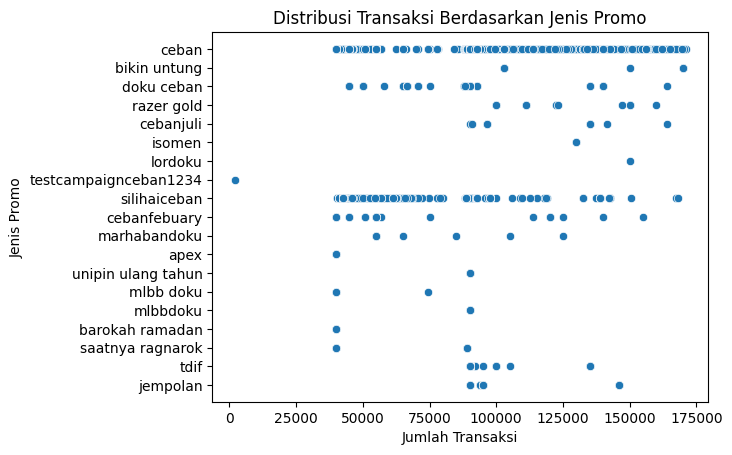

In [98]:
sns.scatterplot(y='Campaign Name', x='paid_amount', data=data)
plt.title('Distribusi Transaksi Berdasarkan Jenis Promo')
plt.ylabel('Jenis Promo')
plt.xlabel('Jumlah Transaksi')
plt.show()

In [99]:
from scipy.stats import f_oneway

# Pisahkan data per promo
promo_groups = [group['paid_amount'] for name, group in data.groupby('unique_campaign')]

# ANOVA
f_stat, p_value = f_oneway(*promo_groups)
print(f"F-statistic: {f_stat}, p-value: {p_value}")


F-statistic: 10335.170621611534, p-value: 0.0


Interpretasi:

Nilai p-value yang sangat kecil (p < 0.05, bahkan mendekati nol) menunjukkan bahwa kita dapat menolak hipotesis nol (H₀). Dengan kata lain, terdapat perbedaan rata-rata jumlah transaksi yang signifikan di antara jenis-jenis promo.

Hal ini menunjukkan bahwa tidak semua jenis promo memiliki efektivitas yang sama dalam meningkatkan jumlah transaksi.

In [100]:
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# tukey = pairwise_tukeyhsd(endog=data['paid_amount'], groups=data['unique_campaign'], alpha=0.05)
# print(tukey)


2. Apakah pelanggan Premium memiliki rata-rata transaksi lebih tinggi?

Hipotesis:
- H₀: Tidak ada perbedaan rata-rata transaksi antara pelanggan Premium dan Non-Premium.
- H₁: Rata-rata transaksi pelanggan Premium lebih tinggi dibandingkan pelanggan Non-Premium.

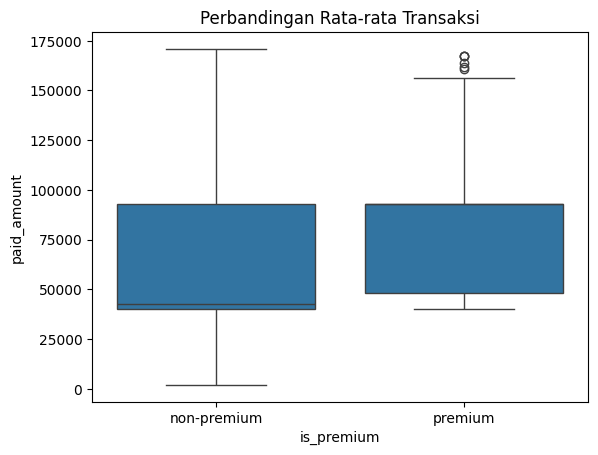

In [101]:
# Boxplot untuk melihat distribusi transaksi
sns.boxplot(x='is_premium', y='paid_amount', data=data)
plt.title("Perbandingan Rata-rata Transaksi")
plt.show()


In [102]:
from scipy.stats import shapiro

# Filter data berdasarkan kelompok
premium_data = data[data['is_premium'] == 'premium']['paid_amount']
non_premium_data = data[data['is_premium'] == 'non-premium']['paid_amount']

# Uji normalitas
print("Premium Group:", shapiro(premium_data))
print("Non-Premium Group:", shapiro(non_premium_data))


Premium Group: ShapiroResult(statistic=0.8477815985679626, pvalue=2.5214476076550553e-31)
Non-Premium Group: ShapiroResult(statistic=0.6775575876235962, pvalue=0.0)


c:\Users\ASUS\envs\env1\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Hasil uji normalitas menunjukkan bahwa data tidak terdistribusi normal, baik untuk kelompok Premium maupun Non-Premium.

Penjelasan detail:

- Premium Group:
Statistik Shapiro-Wilk: 0.8478 dan
p-value: 2.52e-31 (sangat kecil, jauh di bawah 0.05),
Kesimpulan: Data tidak normal.

- Non-Premium Group:
Statistik Shapiro-Wilk: 0.6776 dan
p-value: 0.0 (sangat kecil, jauh di bawah 0.05),
Kesimpulan: Data tidak normal.

Kesimpulan
Karena p-value < 0.05 pada kedua kelompok, kita tolak hipotesis nol (H₀) dari uji normalitas. Artinya, distribusi data transaksi pada kedua kelompok tidak mengikuti distribusi normal.

In [103]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(premium_data, non_premium_data, alternative='greater')
print(f"U-Stat: {u_stat}, P-Value: {p_val}")


U-Stat: 76676977.0, P-Value: 6.8912810909245e-91


Berdasarkan hasil Mann-Whitney U Test, berikut adalah analisis dan kesimpulannya:

Hasil Uji
- U-Statistik: 76,676,977.0
- P-Value: 6.8912810909245e-91 (sangat kecil, jauh di bawah 0.05)

Interpretasi
1. P-Value < 0.05: 
   - Hipotesis nol (H₀) ditolak. 
   - Artinya, terdapat perbedaan signifikan antara rata-rata transaksi pelanggan Premium dan Non-Premium.

2. Karena alternatif hipotesis ( H1 ) adalah bahwa rata-rata transaksi pelanggan Premium lebih tinggi, dan p-value mendukung penolakan (H0), maka dapat disimpulkan:
   - Rata-rata transaksi pelanggan Premium lebih tinggi secara signifikan dibandingkan pelanggan Non-Premium.

**Kesimpulan Akhir:**

Pelanggan Premium memiliki rata-rata transaksi yang lebih tinggi secara signifikan dibandingkan pelanggan Non-Premium berdasarkan hasil analisis statistik dengan p-value yang sangat kecil ( p < 0.05).

Berikut adalah saran yang lebih sederhana berdasarkan hasil analisis:

Karena pelanggan Premium memiliki rata-rata transaksi lebih tinggi, perusahaan bisa:
1. Tingkatkan loyalitas pelanggan Premium** dengan memberikan penawaran eksklusif, seperti diskon tambahan atau akses khusus ke promosi.
2. Buat strategi untuk meningkatkan jumlah pelanggan Premium, misalnya:
- Edukasi manfaat menjadi pelanggan Premium (misalnya akses ke diskon atau layanan tambahan).
- Promosi khusus untuk upgrade ke Premium.
3. Optimalkan Strategi Promosi
- Prioritaskan promosi yang dirancang untuk pelanggan Premium, karena mereka lebih mungkin memberikan nilai transaksi lebih tinggi.
- Ciptakan promosi menarik untuk mendorong keterlibatan pelanggan Non-Premium.

Kesimpulan Utama: Fokus pada mempertahankan pelanggan Premium sambil mendorong pelanggan Non-Premium untuk meningkatkan status mereka. 

---

3. Apakah waktu pelaksanaan promo (misalnya, akhir pekan vs hari kerja) memengaruhi jumlah transaksi?

Hipotesis:

- H₀: Tidak ada perbedaan rata-rata jumlah transaksi antara akhir pekan dan hari kerja.
- H₁: Ada perbedaan rata-rata jumlah transaksi antara akhir pekan dan hari kerja.

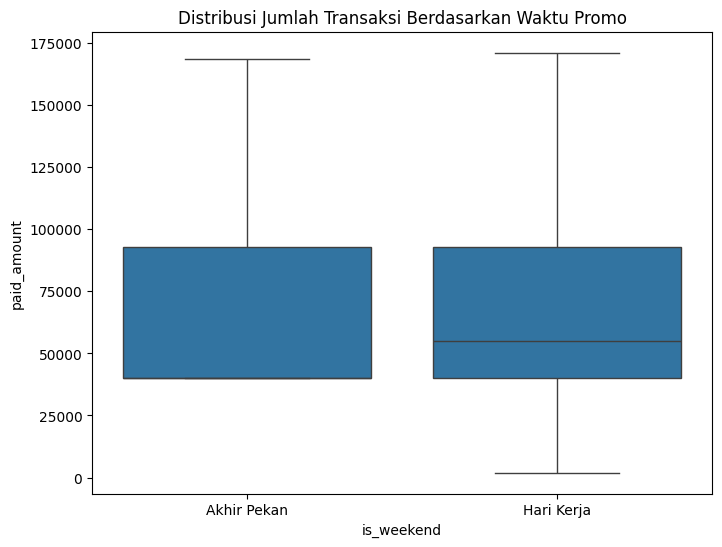

In [104]:
# Boxplot untuk membandingkan jumlah transaksi
plt.figure(figsize=(8,6))
sns.boxplot(x='is_weekend', y='paid_amount', data=data)
plt.title('Distribusi Jumlah Transaksi Berdasarkan Waktu Promo')
plt.show()


In [105]:
# Membagi data berdasarkan waktu
weekend_transactions = data[data['is_weekend'] == 'Akhir Pekan']['paid_amount']
weekday_transactions = data[data['is_weekend'] == 'Hari Kerja']['paid_amount']
# Uji normalitas
print("Weekend transaction:", shapiro(weekend_transactions))
print("Weekday transaction:", shapiro(weekday_transactions))


Weekend transaction: ShapiroResult(statistic=0.644136369228363, pvalue=0.0)
Weekday transaction: ShapiroResult(statistic=0.6876398324966431, pvalue=0.0)


c:\Users\ASUS\envs\env1\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Uji Shapiro-Wilk untuk memeriksa normalitas distribusi pada data akhir pekan (weekend_transactions) dan hari kerja (weekday_transactions) berdasarkan paid_amount.

Hasil:

- p-value = 0.0 untuk kedua grup menunjukkan bahwa data tidak mengikuti distribusi normal.
- Dengan ini, uji statistik parametrik seperti uji-t independen tidak cocok untuk digunakan.

In [106]:
from scipy import stats

# Melakukan Uji Mann-Whitney U
u_stat, p_value = stats.mannwhitneyu(weekend_transactions, weekday_transactions)

# Menampilkan hasil Uji Mann-Whitney U
print(f'Uji Mann-Whitney U: U-stat = {u_stat}, p-value = {p_value}')


Uji Mann-Whitney U: U-stat = 909189898.5, p-value = 0.0


Berdasarkan hasil uji Mann-Whitney U:

- U-statistik = 909189898.5: Ini adalah nilai statistik uji.
- p-value = 0.0: Karena p-value < 0.05, kita menolak hipotesis nol (H₀) yang menyatakan bahwa tidak ada perbedaan dalam jumlah transaksi antara akhir pekan (weekend) dan hari kerja (weekday).

Kesimpulan:
Ada perbedaan yang signifikan dalam jumlah transaksi antara akhir pekan dan hari kerja. Waktu pelaksanaan promo (weekend vs. weekday) mempengaruhi jumlah transaksi.

In [107]:
weekend_median = weekend_transactions.median()
weekday_median = weekday_transactions.median()
print(f"Median Weekend: {weekend_median}, Median Weekday: {weekday_median}")


Median Weekend: 40000.0, Median Weekday: 55000.0


Interpretasi:
Median Weekend (40.000) lebih rendah dibandingkan Median Weekday (55.000).
Ini berarti jumlah transaksi cenderung lebih rendah pada akhir pekan dibandingkan hari kerja.
- Signifikansi Praktis:Perbedaan median sebesar 15.000 (55.000 - 40.000) perlu ditinjau dari sisi dampaknya pada bisnis:

Jika perbedaan ini berdampak besar pada pendapatan, maka perlu perhatian khusus untuk meningkatkan transaksi pada akhir pekan.
Jika dampaknya kecil secara praktis, fokus dapat tetap pada hari kerja.

Strategi Bisnis:

Untuk meningkatkan transaksi akhir pekan, pertimbangkan strategi seperti:
- Promo spesial akhir pekan.
- Diskon tambahan untuk kategori tertentu pada Sabtu-Minggu.
- Optimalkan promosi pada hari kerja untuk memperkuat kinerja yang sudah baik.

--- 

#### Analisis Outlier

In [108]:
outliers

,campaign_id,Campaign Name,Campaign Code,Code Used,Code Quota,Campaign Start Date,Campaign End Date,Promo Duration,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt,is_premium
3730,911,ramadanbnetfit,ramadanbnetfit10,33,200,2024-03-27,2024-04-30 23:59:00,34 days,44603,other,2024-04-01 06:55:00,22,m,bogor,wirausaha,222278,5709381,1,premium
3731,911,ramadanbnetfit,ramadanbnetfit10,33,200,2024-03-27,2024-04-30 23:59:00,34 days,44603,other,2024-04-01 08:05:00,33,m,lainnya,lainnya,222278,5710089,1,non-premium
3732,913,ramadanbnetfit,bnetfitramadan10,1,200,2024-03-27,2024-04-30 23:59:00,34 days,44603,other,2024-04-01 10:04:00,33,m,lainnya,lainnya,222278,5623774,1,non-premium
3733,911,ramadanbnetfit,ramadanbnetfit10,33,200,2024-03-27,2024-04-30 23:59:00,34 days,44603,other,2024-04-01 12:18:00,32,m,padang,karyawan swasta,324804,746771,1,premium
3734,910,ramadanbnet,ramadanbnetfit20,2,200,2024-03-27,2024-04-30 23:59:00,34 days,44603,other,2024-04-01 13:32:00,33,m,lainnya,lainnya,571111,5710743,1,non-premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108226,900,ceban,cebantagihan24,1500,1500,2024-02-25,2024-03-10 23:59:00,14 days,4658,other,2024-02-26 13:31:00,30,f,jakarta timur,karyawan swasta,492750,4292916,1,premium
108229,900,ceban,cebantagihan24,1500,1500,2024-02-25,2024-03-10 23:59:00,14 days,4658,other,2024-02-26 13:49:00,27,m,tabanan,karyawan swasta,491000,4241652,1,premium
108248,900,ceban,cebantagihan24,1500,1500,2024-02-25,2024-03-10 23:59:00,14 days,4658,other,2024-02-26 16:17:00,39,f,tangerang,karyawan swasta,192750,880394,1,premium
108307,900,ceban,cebantagihan24,1500,1500,2024-02-25,2024-03-10 23:59:00,14 days,4658,other,2024-02-26 17:46:00,31,m,lainnya,karyawan swasta,291000,3301106,1,non-premium


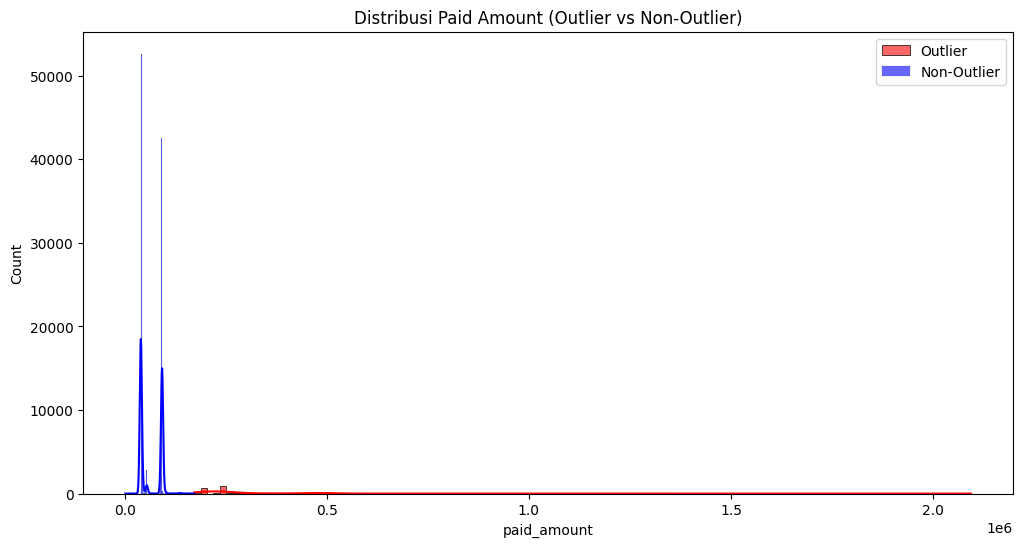

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\1886119749.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['category'] = 'Outlier'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\1886119749.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'] = 'Non-Outlier'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6580\1886119749.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

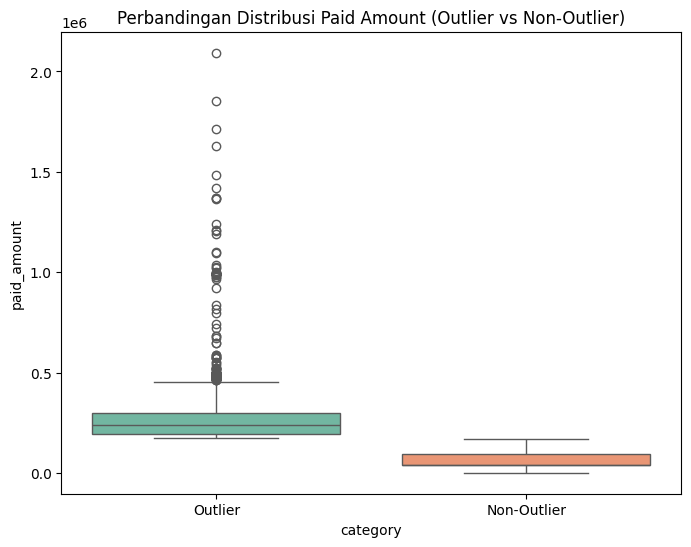

In [109]:
# Histogram untuk outlier dan non-outlier
plt.figure(figsize=(12, 6))
sns.histplot(outliers['paid_amount'], color='red', label='Outlier', kde=True, alpha=0.6)
sns.histplot(data['paid_amount'], color='blue', label='Non-Outlier', kde=True, alpha=0.6)
plt.legend()
plt.title('Distribusi Paid Amount (Outlier vs Non-Outlier)')
plt.show()

# Menambahkan kategori untuk gabungkan kedua dataset
outliers['category'] = 'Outlier'
data['category'] = 'Non-Outlier'

# Gabungkan kedua dataset
combined_data = pd.concat([outliers, data])

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_data, x='category', y='paid_amount', palette='Set2')
plt.title('Perbandingan Distribusi Paid Amount (Outlier vs Non-Outlier)')
plt.show()


Kontribusi Outlier: 9.82%
Kontribusi Non-Outlier: 90.18%


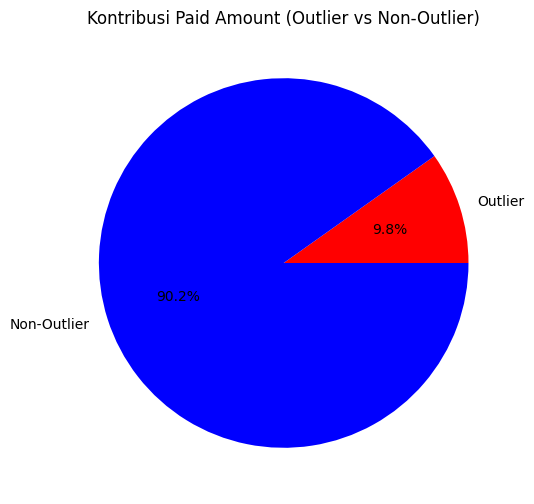

In [110]:
# Kontribusi total paid_amount
outlier_contribution = outliers['paid_amount'].sum()
non_outlier_contribution = data['paid_amount'].sum()

# Persentase kontribusi
total_contribution = outlier_contribution + non_outlier_contribution
outlier_percentage = (outlier_contribution / total_contribution) * 100
non_outlier_percentage = (non_outlier_contribution / total_contribution) * 100

# Menampilkan hasil
print(f"Kontribusi Outlier: {outlier_percentage:.2f}%")
print(f"Kontribusi Non-Outlier: {non_outlier_percentage:.2f}%")

# Diagram pie kontribusi
plt.figure(figsize=(6, 6))
plt.pie([outlier_contribution, non_outlier_contribution], 
        labels=['Outlier', 'Non-Outlier'], 
        autopct='%1.1f%%', 
        colors=['red', 'blue'])
plt.title('Kontribusi Paid Amount (Outlier vs Non-Outlier)')
plt.show()


In [111]:
# Analisis tambahan untuk outlier
outlier_behavior = outliers.groupby('Campaign Name')['paid_amount'].mean()

# Menampilkan hasil
print("Rata-rata Paid Amount Outlier per Kategori:")
print(outlier_behavior)


Rata-rata Paid Amount Outlier per Kategori:
Campaign Name
bikin untung          250000
ceban                 296130
cebanfebuary          276765
cebanjuli             372071
doku ceban            314139
doku sobat pejuang    450000
isomen                536010
jempolan              240000
lordoku               271692
proklamasi           1211500
ramadanbnet           575057
ramadanbnetfit        229359
razer gold            175000
saatnya bittime       508253
silihaiceban          306175
sobat pejuang doku   1100000
tdif                  236182
Name: paid_amount, dtype: float64


In [112]:
performa_outlier =outliers.groupby(['Campaign Code', 'Campaign Name']).agg({
    'paid_amount': ['mean', 'sum', 'count']
}).reset_index()

performa_outlier.columns = ['Campaign Code', 'Campaign Name', 'Avg Transaction Value', 'Total Revenue', 'Transaction Count']
performa_outlier

,Campaign Code,Campaign Name,Avg Transaction Value,Total Revenue,Transaction Count
0,anakbaru,lordoku,283390,5667800,20
1,anaklama,lordoku,213200,852800,4
2,angpaoceban,ceban,394000,5122000,13
3,angpaocebantagihan,ceban,277338,3882737,14
4,angpaounipin25,bikin untung,250000,69750000,279
...,...,...,...,...,...
83,tagihanyaceban,doku ceban,278845,6971130,25
84,tagihanyaceban1,ceban,308289,8323799,27
85,tdifcoda,tdif,275000,275000,1
86,tdifcoda10,tdif,236641,37862600,160


In [113]:
performa_outlier.describe()

,Avg Transaction Value,Total Revenue,Transaction Count
count,88,88,88
mean,335914,8399087,29
std,182183,16839022,64
min,175000,178100,1
25%,246809,893875,3
50%,285982,3468242,12
75%,358605,8379585,27
max,1211500,119040000,496


Berdasarkan statistik deskriptif yang diberikan, berikut adalah kesimpulan untuk **Avg Transaction Value**, **Total Revenue**, dan **Transaction Count**:

1. **Rata-Rata Transaksi dan Total Pendapatan:**
   - **Rata-rata nilai transaksi** adalah **Rp 335.914**, dengan **standar deviasi** yang cukup tinggi (Rp 182.183), menunjukkan variasi yang besar dalam nilai transaksi.
   - **Total pendapatan rata-rata** adalah **Rp 8.399.087**, dengan **standar deviasi** yang sangat tinggi (Rp 16.839.022), yang menunjukkan beberapa kampanye dengan pendapatan jauh lebih tinggi dari rata-rata.

2. **Rentang Transaksi:**
   - **Jumlah transaksi** rata-rata per kampanye adalah **29 transaksi**, dengan **standar deviasi** yang besar (64 transaksi), menunjukkan adanya beberapa kampanye dengan jumlah transaksi yang sangat tinggi.
   - **Jumlah transaksi per kampanye** berkisar antara **1 hingga 496 transaksi**, menunjukkan adanya kampanye dengan volume transaksi sangat rendah dan sangat tinggi.

3. **Distribusi Data:**
   - Di kuartil ke-25 hingga ke-75, nilai transaksi dan pendapatan cenderung berada dalam rentang yang lebih terkonsentrasi, meskipun masih terdapat variasi yang cukup besar.
   - Beberapa kampanye dengan nilai transaksi atau total pendapatan sangat tinggi dapat dianggap sebagai outlier.

**Kesimpulan Umum:**
Data ini menunjukkan adanya **variabilitas yang besar** dalam kampanye, baik dari sisi nilai transaksi, total pendapatan, dan jumlah transaksi. Beberapa kampanye sangat sukses dengan pendapatan dan jumlah transaksi yang tinggi, sementara lainnya memiliki hasil yang rendah. Ini menunjukkan bahwa strategi kampanye yang efektif dapat bervariasi secara signifikan, dan perlu adanya penyesuaian berdasarkan segmen atau karakteristik pelanggan yang berbeda.

In [114]:
# Analisis non-outlier berdasarkan kategori menggunakan paid_amount
non_outlier_category_analysis = data.groupby('Campaign Name')['paid_amount'].mean()

# Menampilkan hasil
print("Rata-rata Paid Amount Non-Outlier per Kategori:")
print(non_outlier_category_analysis)


Rata-rata Paid Amount Non-Outlier per Kategori:
Campaign Name
apex                     40000
barokah ramadan          40000
bikin untung            128061
ceban                    63528
cebanfebuary             45601
cebanjuli               119648
doku ceban               90959
isomen                  130000
jempolan                 95402
lordoku                 150000
marhabandoku             75000
mlbb doku                40187
mlbbdoku                 90000
razer gold              100931
saatnya ragnarok         87299
silihaiceban             64009
tdif                     99550
testcampaignceban1234     2000
unipin ulang tahun       90000
Name: paid_amount, dtype: float64


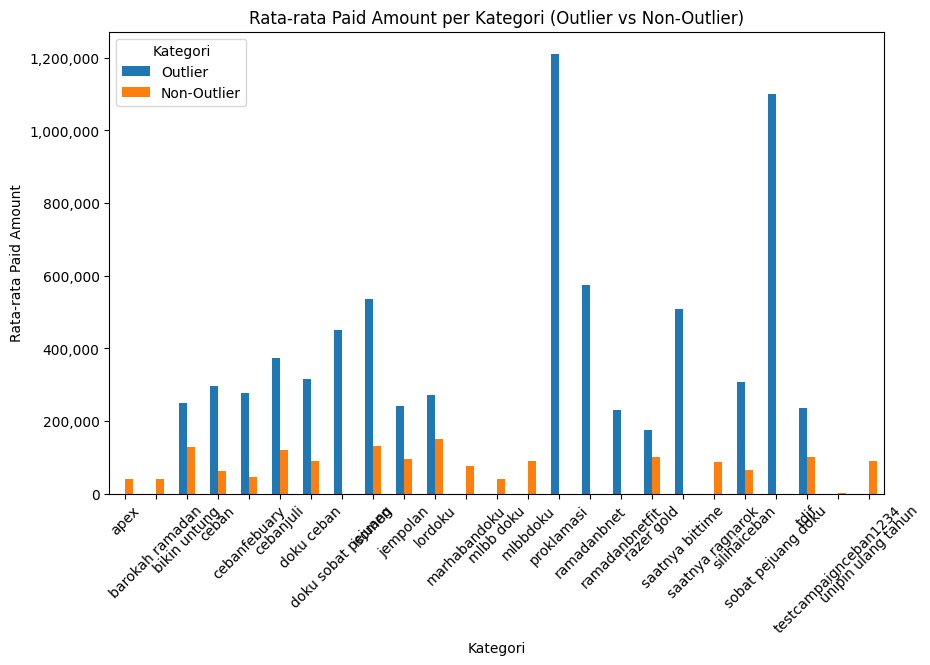

In [115]:
# Gabungkan hasil analisis outlier dan non-outlier
category_comparison = pd.DataFrame({
    'Outlier': outlier_behavior,
    'Non-Outlier': non_outlier_category_analysis
}).reset_index()

import matplotlib.ticker as ticker

# Plot bar chart
ax = category_comparison.plot(x='Campaign Name', kind='bar', figsize=(10, 6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format angka ribuan

plt.title('Rata-rata Paid Amount per Kategori (Outlier vs Non-Outlier)')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Paid Amount')
plt.xticks(rotation=45)
plt.legend(title='Kategori')
plt.show()


In [116]:
# Daftar campaign unik dari data outlier dan non-outlier
outlier_campaigns = set(outliers['Campaign Name'].unique())
non_outlier_campaigns = set(data['Campaign Name'].unique())

# Campaign yang hanya ada pada outlier
only_in_outlier = outlier_campaigns - non_outlier_campaigns
print("Campaign hanya di Outlier:")
print(only_in_outlier)

# Campaign yang hanya ada pada non-outlier
only_in_non_outlier = non_outlier_campaigns - outlier_campaigns
print("\nCampaign hanya di Non-Outlier:")
print(only_in_non_outlier)


Campaign hanya di Outlier:
{'proklamasi', 'doku sobat pejuang', 'ramadanbnetfit', 'ramadanbnet', 'saatnya bittime', 'sobat pejuang doku'}

Campaign hanya di Non-Outlier:
{'saatnya ragnarok', 'unipin ulang tahun', 'testcampaignceban1234', 'mlbbdoku', 'barokah ramadan', 'apex', 'mlbb doku', 'marhabandoku'}


Kesimpulan:
- Outlier berkontribusi hampir 10% terhadap pendapatan total, meskipun jumlahnya kecil.
- Non-outlier memberikan kontribusi stabil (90%), tetapi ada peluang untuk meningkatkan jumlah transaksi mereka.
- Strategi yang terfokus pada kedua kelompok akan memaksimalkan pertumbuhan pendapatan sambil mengurangi risiko ketergantungan pada outlier.